## Analysis of the simulation Files to produce the energy distribution 

In [3]:
#%matplotlib notebook
import uproot as ur
import matplotlib.pyplot as plt
import k3d
import numpy as np
import mplhep as hep
from __future__ import print_function
from scipy.optimize import curve_fit
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.legend_handler import HandlerLine2D

#from scipy.stats import norm
import matplotlib.lines as mlines
import matplotlib.colors as mcolors
from scipy import integrate
import mplhep as hep
hep.set_style(hep.style.CMS)


params = {'legend.fontsize': '23',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'40',
         'ytick.labelsize':'40',
         'axes.labelsize': '40',
         'axes.titlesize': '40'}
tick_size=4
tick_width=6
#plt.rc_params[axis='y', which='both')
plt.style.use(hep.style.CMS)
plt.rcParams.update(params)
plt.rcParams['xtick.major.size'] = 10  ## Tick size
plt.rcParams['xtick.major.width'] = tick_width
plt.rcParams['xtick.minor.size'] = tick_size
plt.rcParams['xtick.minor.width'] = tick_width


plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = tick_size
plt.rcParams['ytick.minor.size'] = tick_size
plt.rcParams['ytick.minor.width'] = tick_width


plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

#ax1.tick_params('both', length=20, width=2, which='major')
#ax1.tick_params('both', length=10, width=1, which='minor')
sampling_fraction_hcali=0.0098*1000
sampling_fraction_hcal=0.022*1000

## Some of input parameters
### 1) Input path file
### 2) Energy and time threshold 
### 3) Fitting range

In [14]:
#### CHOOSE ELECTRON OR PION ('electron' and 'Pion')
FilePathReco="/media/miguel/Elements/HCAL_Insert_Sim_Files/updated_hcal_layers/"
## PATH WHERE FIGURE ARE SAVED  
#PathToPlot='/Users/bishnukarki/EIC/Plots/'      
Energy_Threshold=0.06 #(Mev)
Time_Threshold=50 #ns
MIP=0.6 #GeV
Gev_To_MeV=1000
Sigma_For_leakage=3
Mean_pions=[]
Mean_electrons=[]
#ienergy=10
theta=2.83
FIT_SIGMA=3.0
def gaussian(x, amp, mean, sigma):
    return amp * np.exp( -0.5*((x - mean)/sigma)**2) /sigma
import plots

## This codes draws the energy response for electron and pion on same plot

0       0
HELLO JELLO 3000
HELLO JELLO 3000
1       0
HELLO JELLO 2000
HELLO JELLO 2000
0       1
HELLO JELLO 3000
HELLO JELLO 3000
1       1
HELLO JELLO 2000
HELLO JELLO 2000
0       2
HELLO JELLO 2000
HELLO JELLO 2000
1       2
HELLO JELLO 2000
HELLO JELLO 2000
0       3
HELLO JELLO 2000
HELLO JELLO 2000
1       3
HELLO JELLO 2000
HELLO JELLO 2000


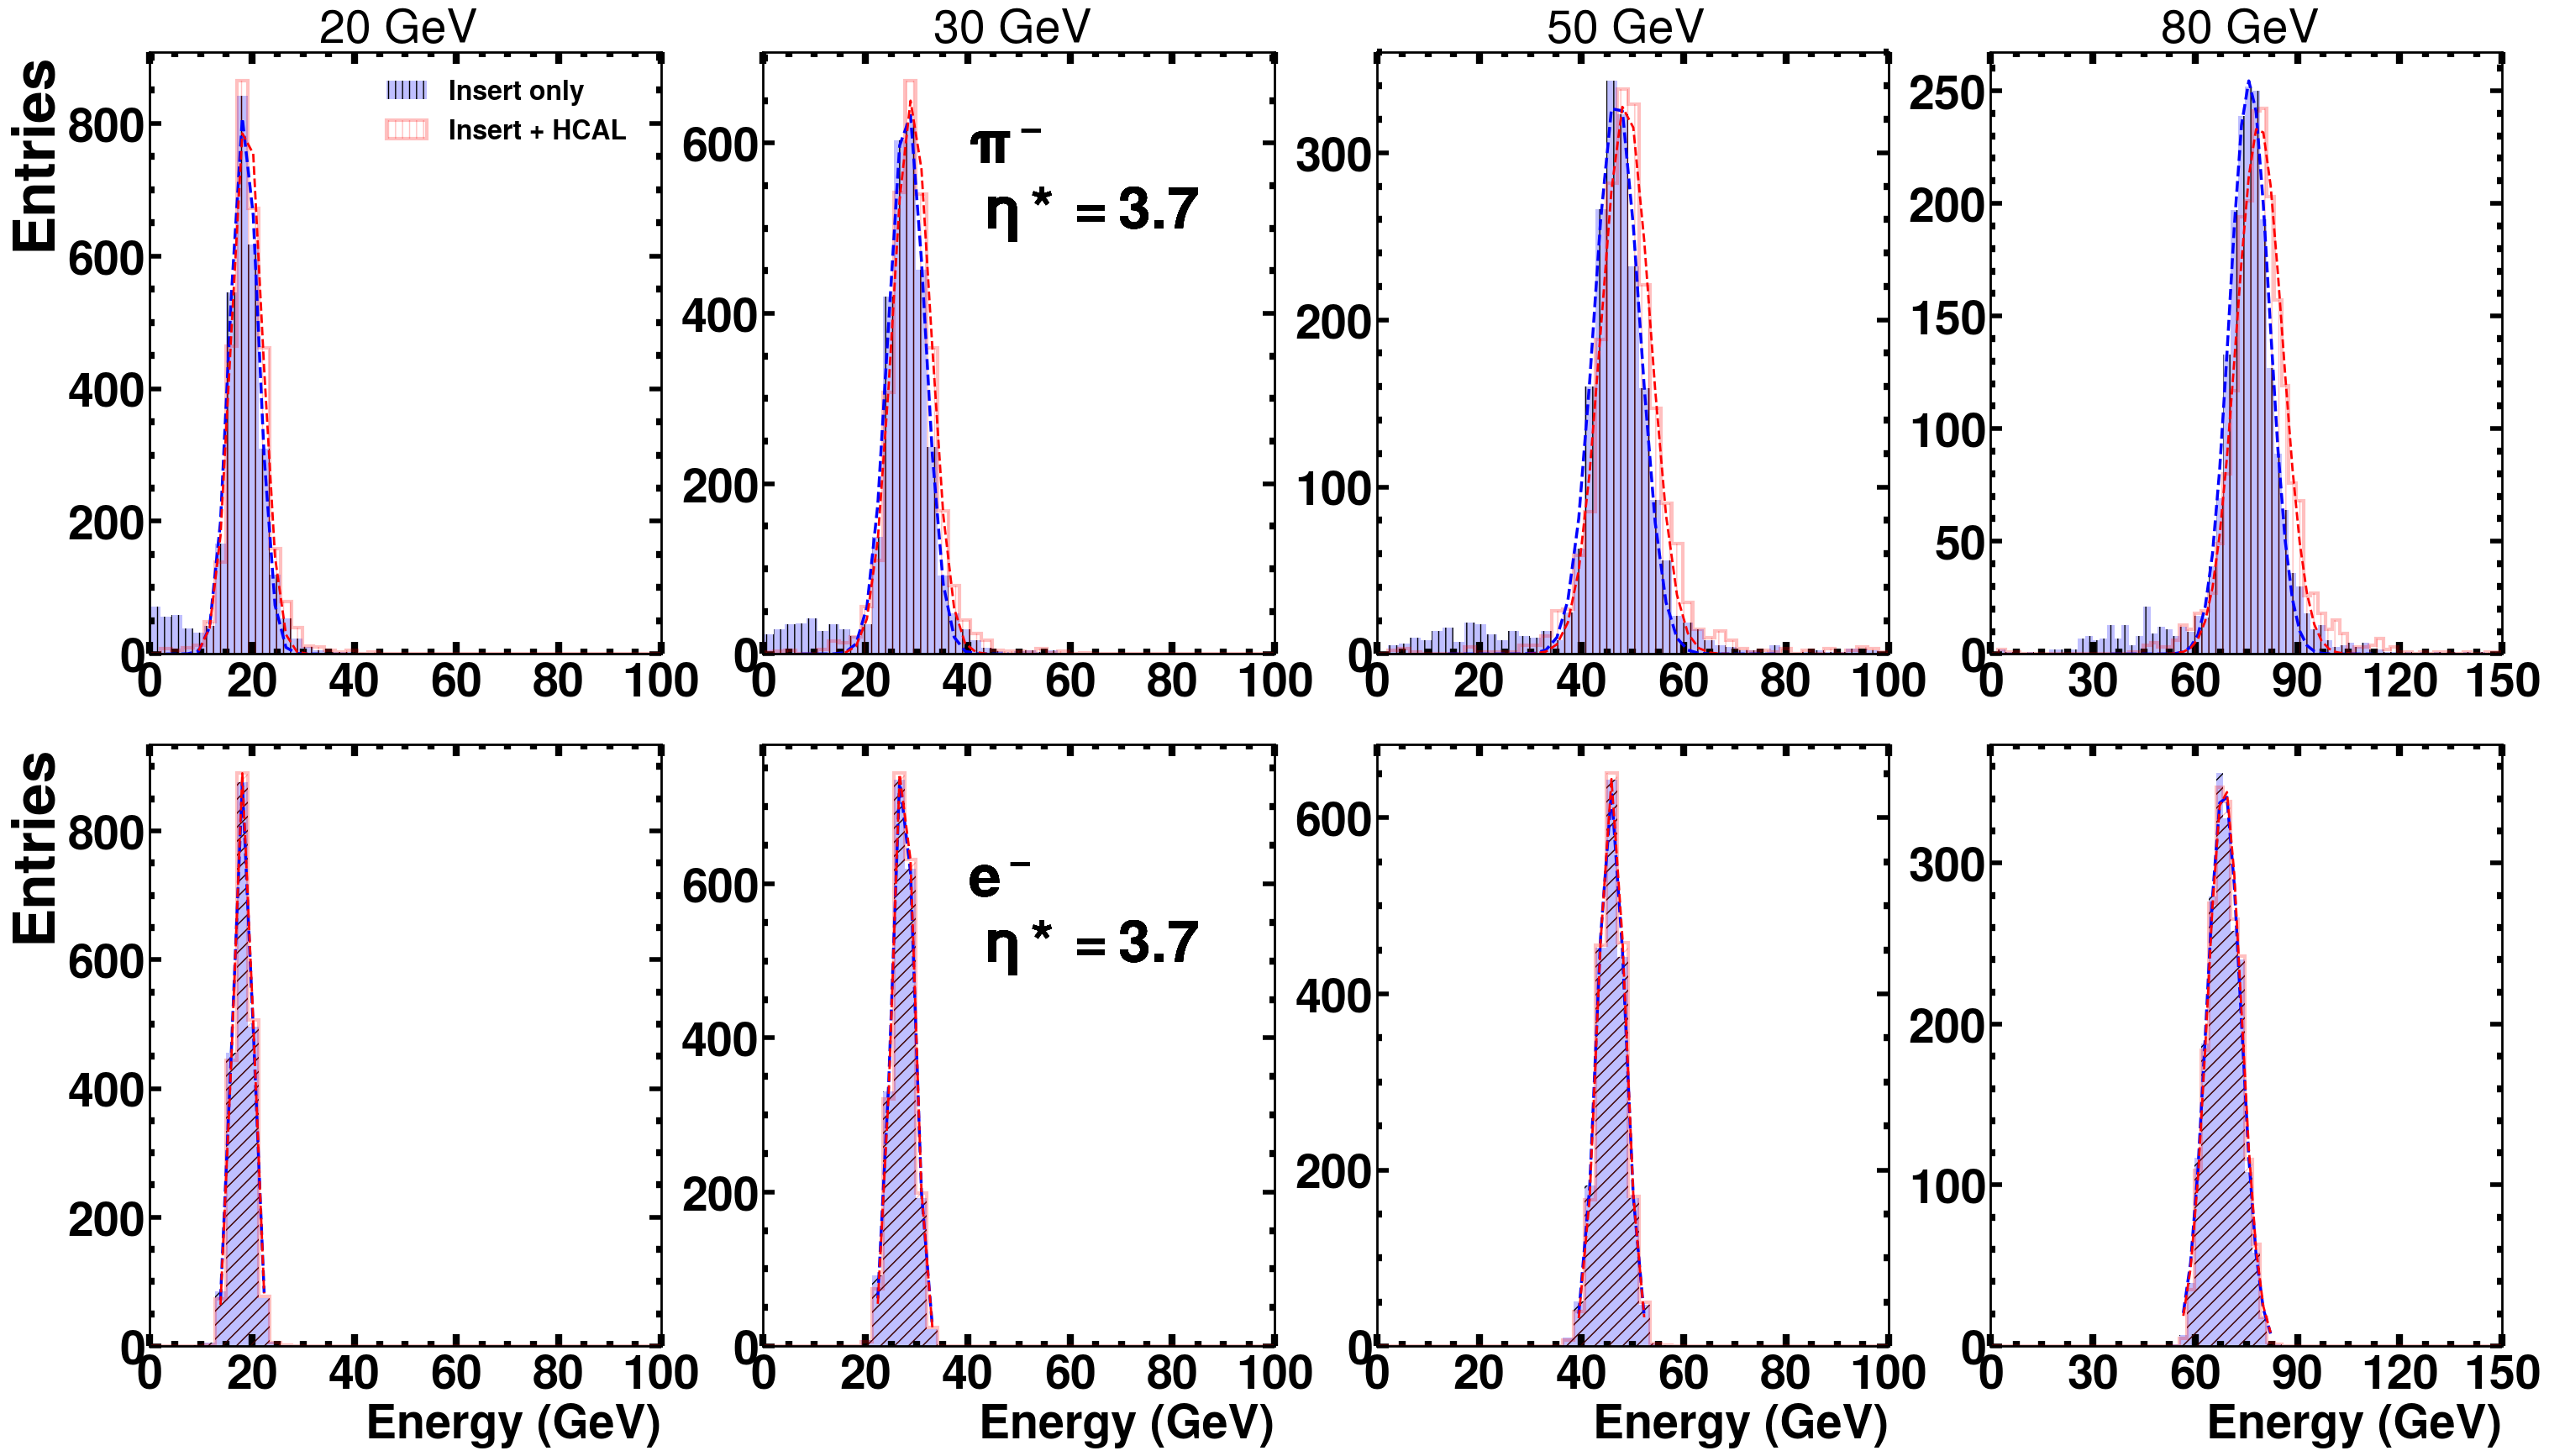

In [15]:
def get_fitted_mean_std(wt='on'):
   
    pi_means=[]
    pi_stds=[]
    pi_resolutions=[]
    pi_resolution_errors=[]
    pi_means_error=[]
    pi_stds_error=[]
    pi_leaks_per=[]
    pi_leaks_per_error=[]
    
    el_means=[]
    el_stds=[]
    el_resolutions=[]
    el_resolution_errors=[]
    el_means_error=[]
    el_stds_error=[]
    el_leaks_per=[]
    el_leaks_per_error=[]
    fraction=1 #(total events selected = events/fraction)
    #fileindex='deg_Fe-W' 
    #fileindex="deg" ## This is file borrowed Ryan with _BERT_HP
    fileindex="deg_Athena_30W_24Fe" 
    
    max_range=1300
    nbins=200
    particles=['pi-','e-']
    
    #energies=[50]
    energies=[20,30,50, 80]
    ncols=len(energies)
    fig,ax = plt.subplots(2,ncols,figsize=(35,20))#, sharex=True)#, sharey=True
    plt.subplots_adjust(left=0.1,  wspace=0.2, hspace=0.15)
    legend_col=int(len(energies))-1
    
    if wt=='on':
        sampling_fraction_hcali=0.0098*1000 #(GeV-1)
        sampling_fraction_hcal=0.022*1000  #(GeV-1)
        max_range=160
        nbins=75
        xdiv=20
        xlabel="Energy (GeV)"
    else:
        sampling_fraction_hcali=1 #(GeV-1)
        sampling_fraction_hcal=1  #(GeV-1)
        max_range=1300
        nbins=100
        xlabel="Energy (MeV)"
        xdiv=400
    min_range=0
    xlim_maxrange=[100,100,100,150]
    xlim_minrange=[0,0,0,0]
    for ienergy in energies:
        index = energies.index(ienergy)
        
        
        for particle in particles:
            plt_i=particles.index(particle)
            
            print(plt_i,'     ',index)
            
            greek_particle=plots.get_greek_particle(particle)
            if particle=='e-':
                particle_hatch="//"
            else:
                particle_hatch="||"
            
            ### READ INSERT ONLY 
            ene,time,PosRecoX,PosRecoY,PosRecoZ,mass,mom,energy_gen,phi,ene_good=plots.read_rootfile_HCAL_Insert\
            (fileindex,fraction,FilePathReco,ienergy,theta,particle, Time_Threshold,Energy_Threshold)
            
            

            # READ HCAL ONLY 

            ene_hcal,time_hcal,PosRecoX_hcal,PosRecoY_hcal,PosRecoZ_hcal,mass_hcal,mom_hcal,energy_gen_hcal, \
            phi_hcal,ene_good_hcal=plots.read_rootfile_HCAL(fileindex,fraction,FilePathReco,ienergy,theta,particle,\
                                                             Time_Threshold,Energy_Threshold)
            # INSERT SUM ONLY
            ene_total_Insert_temp = np.sum(ene_good,axis=-1)
            ene_total_Insert = np.divide(ene_total_Insert_temp,sampling_fraction_hcali)  
             
   
            
            ene_average = np.mean(ene_good,axis=-1)
            mean_guess_Insert=np.mean(ene_total_Insert)
            sigma_guess_Insert=np.std(ene_total_Insert)
           

            ### HCAL ONLY
            ene_total_hcal_only_temp = np.sum(ene_good_hcal,axis=-1)
            ene_total_hcal_only = np.divide(ene_total_hcal_only_temp,sampling_fraction_hcal)
            ### HCAL + HCAL INSERT
            ene_total_hcal=np.add(ene_total_hcal_only,ene_total_Insert)
            mean_guess_hcal=np.mean(ene_total_hcal)
            sigma_guess_hcal=np.std(ene_total_hcal)

            #print(mean_guess_Insert,'  ', mean_guess_hcal, '   sigma ',sigma_guess_Insert,'   ',sigma_guess_hcal)

            #FOR INSERT
            count, bins,_= ax[plt_i][index].hist(np.array(ene_total_Insert),bins=nbins,alpha=0.25,range=(0,max_range),\
                                          label='Insert only',linewidth='1',color='b',hatch=particle_hatch)


            binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
              ## CHOOSE THE DATA POINTS WITHxIN GIVEN SIGMAS FOR FITTING
            mask=(binscenters>(mean_guess_Insert-FIT_SIGMA*sigma_guess_Insert)) & \
            (binscenters<(mean_guess_Insert+FIT_SIGMA*sigma_guess_Insert))
            
            
            
            # FOR HCAL  + HCAL Insert
            count_hcal, bins_hcal,_= ax[plt_i][index].hist(np.array(ene_total_hcal),bins=nbins,alpha=0.25,range=(0,max_range),\
                                                    label='Insert + HCAL ',linewidth='3',color='red', 
                                                           histtype='step', hatch=particle_hatch)
            binscenters_hcal = np.array([0.5 * (bins_hcal[i] + bins_hcal[i+1]) for i in range(len(bins_hcal)-1)])
            #print ()
            mask_hcal=(binscenters_hcal>(mean_guess_hcal-FIT_SIGMA*sigma_guess_hcal)) & \
            (binscenters_hcal<(mean_guess_hcal+FIT_SIGMA*sigma_guess_hcal))
            
          

            
           
            
            #error_s=np.sqrt()
            #error_s=np.where(error_s==0,1,error_s)

            #error_hcal=np.sqrt()
            #error_hcal=np.where(error_hcal==0,1,error_hcal)
            

            # PARAMETER BOUNDS ARE NOT USED FOR NOW INSERT
            param_bounds=([-np.inf,-np.inf,-np.inf], [np.inf,np.inf,np.inf])
            popt, pcov = curve_fit(gaussian, binscenters[mask], count[mask],p0=[np.max(count),mean_guess_Insert,\
                                            sigma_guess_Insert], bounds=param_bounds)
            
            ax[plt_i][index].plot(binscenters[mask], gaussian(binscenters[mask], *popt), color='blue', \
                                  linewidth=2.5, linestyle='dashed' )
            
            
            
            
             # PARAMETER BOUNDS ARE NOT USED FOR NOW HCAL + HCAL_INSERT

            
            popt_hcal, pcov_hcal = curve_fit(gaussian, binscenters_hcal[mask_hcal], count_hcal[mask_hcal],\
                                             p0=[np.max(count_hcal),mean_guess_hcal, sigma_guess_hcal], \
                                             bounds=param_bounds)
            
            

            
            ax[plt_i][index].plot(binscenters_hcal[mask_hcal], gaussian(binscenters_hcal[mask_hcal], *popt_hcal), \
                           color='red', linewidth=2, linestyle='dashed')#,label=r'Fit (Insert + HCal)'
            
            
            ax[0][index].set_title("{0} GeV ".format(ienergy))#  $\eta*$=3.7
            ax[plt_i][index].set_xlim(xlim_minrange[index],xlim_maxrange[index])
            if index==len(energies)-1:
                xdiv=30
            ax[plt_i][index].xaxis.set_major_locator(MultipleLocator(xdiv))
            #ax[index].set_xlabel("Event energy (MeV)",fontsize=30)

            ax[1][index].set_xlabel(xlabel,fontsize=40)
            ax[plt_i][0].set_ylabel("Entries",fontsize=50)
            #ax[plt_i[index]].setxlim(xlim_minrange,xlim_maxrange)
            
            #ax[plt_i][index].set_aspect('auto')
            ### GET MEAN SIGMA AND ERRORS FROM FIT
            mean=popt[1]
            std=popt[2]
            
            #FigName='Fit_SimEnergy_4plots_{0}.pdf'.format(particle)
            ax[0][1].text(40, 500, '$\pi^-$\n $\eta*=3.7$', color='black',\
            bbox=dict(facecolor='none', edgecolor='none', boxstyle='round'),fontsize=50)
            
            ax[1][1].text(40, 500, '$e^-$\n $\eta*=3.7$', color='black',\
            bbox=dict(facecolor='none',edgecolor='none', boxstyle='round'), fontsize=50)
            FigName='Fit_SimEnergy_4plots.pdf'
            ax[0][0].legend(loc='upper right')
            #ax[0][0].set_ylim(0,700)
            #ax[0][0].yaxis.set_major_locator(MultipleLocator(200))
            #ax[1][0].legend(loc='upper right')
            #plt.legend(loc='upper right')
            #plt.savefig(f"{PathToPlot}{FigName}")
            
            #plt.show() 
            
            
    #plots.print_decimal_pi(pi_means, pi_means_error, pi_stds,pi_stds_error,pi_leaks_per, pi_leaks_per_error,pi_resolutions,pi_resolution_errors)
    #plots.print_decimal_el(el_means, el_means_error, el_stds,el_stds_error,el_leaks_per, el_leaks_per_error,el_resolutions,el_resolution_errors)
   
    
             


#plt.subplots_adjust(wspace=0, hspace=0)
#plt.legend()
#
plt.show()    

get_fitted_mean_std('on')

## Just for the one plot (energy theta HCAL + HCALI  and HCALI  together) 

0       0
HELLO JELLO 3000
HELLO JELLO 3000
HELLO JELLO 3000


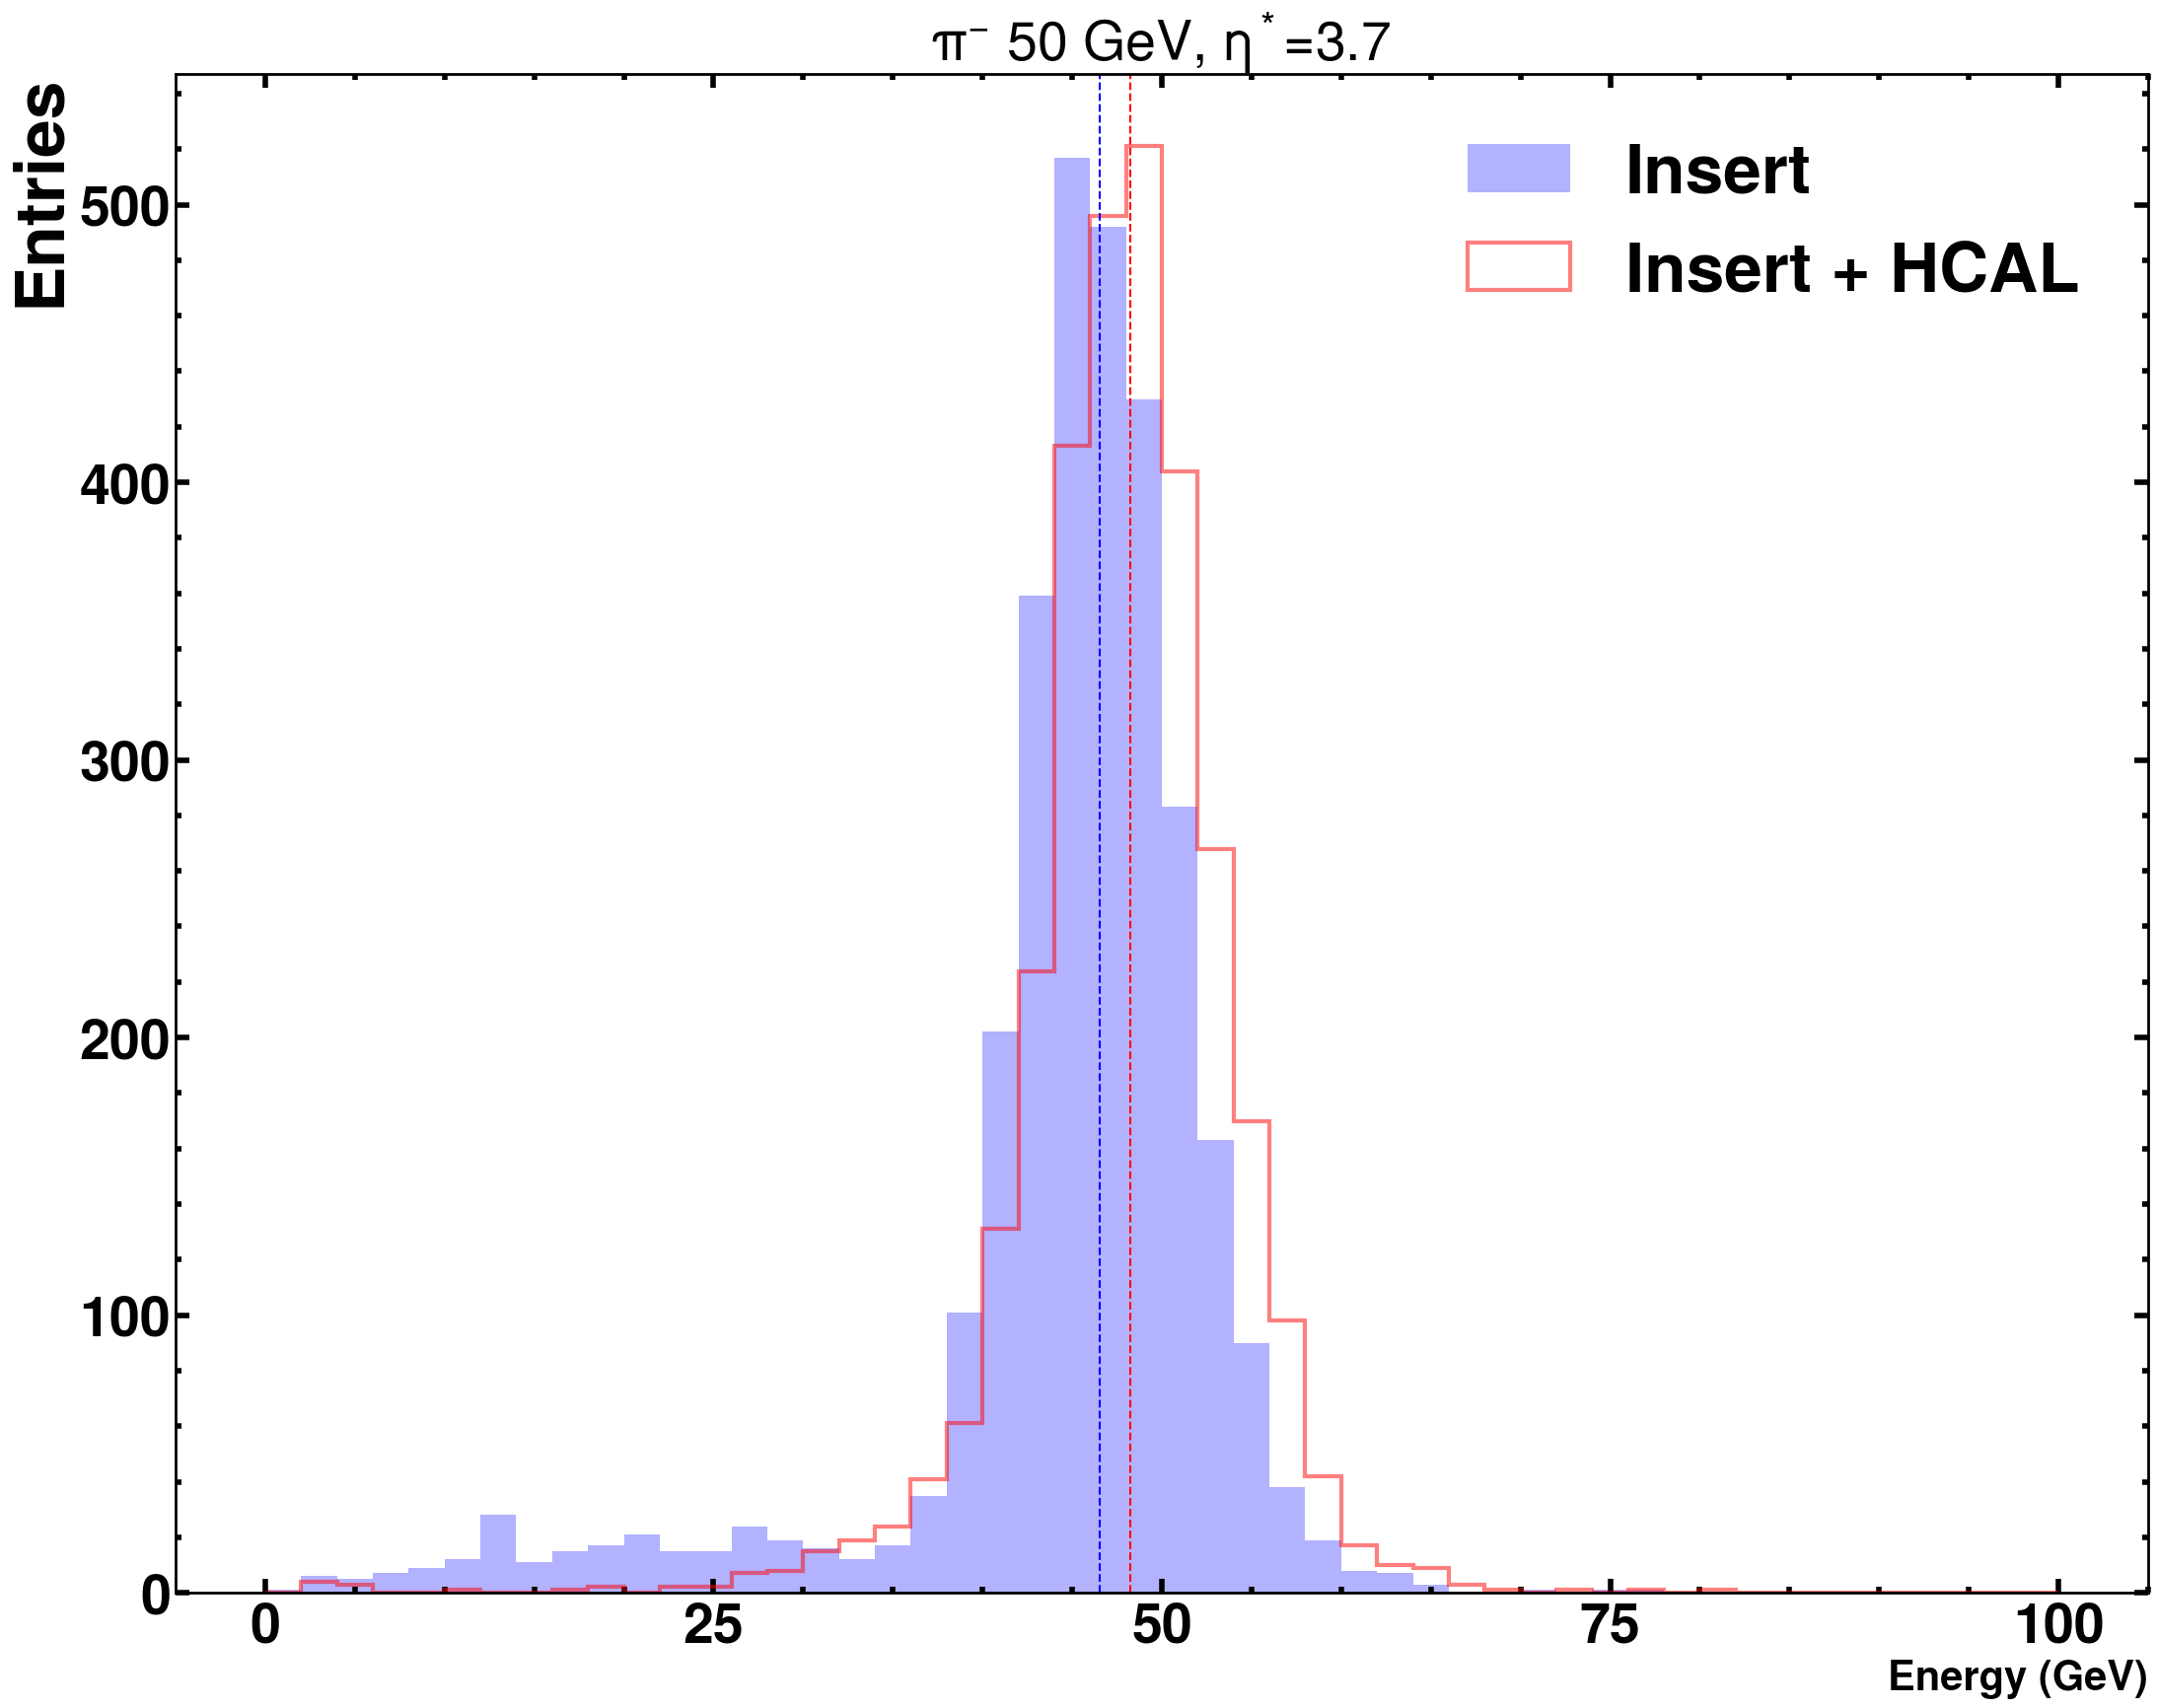

In [17]:
#FilePathReco="/Users/bishnukarki/EIC/HCAL_Insert_Sim_Files/"
#FilePathReco="/media/miguel/Elements/HCAL_Insert_Sim_Files/updated_hcal_layers/"
from matplotlib.lines import Line2D
def get_fitted_mean_std(wt='on'):
    ## weight on for the weighted average
    pi_means=[]
    pi_stds=[]
    pi_resolutions=[]
    pi_resolution_errors=[]
    pi_means_error=[]
    pi_stds_error=[]
    pi_leaks_per=[]
    pi_leaks_per_error=[]
    
    el_means=[]
    el_stds=[]
    el_resolutions=[]
    el_resolution_errors=[]
    el_means_error=[]
    el_stds_error=[]
    el_leaks_per=[]
    el_leaks_per_error=[]
    fraction=1 #(total events selected = events/fraction)
    fileindex="deg_Athena_40W_14Fe" 
    fig,ax = plt.subplots(1,1,figsize=(25,20),sharey=True,sharex=True)
    plt.subplots_adjust(left=0.1,  wspace=0.0, hspace=0.)
        
    
    min_range=0
    particles=['pi-']
    theta=2.83
    eta=plots.get_eta(theta)
   
    energies=[50]
    if wt=='on':
        sampling_fraction_hcali=0.0098*1000 #(GeV-1)
        sampling_fraction_hcal=0.022*1000  #(GeV-1)
        max_range=100
        nbins=50
        xlabel="Energy (GeV)"
    else:
        sampling_fraction_hcali=1 #(GeV-1)
        sampling_fraction_hcal=1  #(GeV-1)
        max_range=800
        nbins=100
        xlabel="Energy (MeV"
        
    xdiv=int((max_range-min_range)/4)

    for ienergy in energies:
        index = energies.index(ienergy)
        
       
        for particle in particles:
            plt_i=particles.index(particle)
            
            print(plt_i,'     ',index)
            greek_particle=plots.get_greek_particle(particle)
            
            ### FOR INSERT 
            ene,time,PosRecoX,PosRecoY,PosRecoZ,mass,mom,energy_gen,phi,ene_good=plots.read_rootfile_HCAL_Insert\
            (fileindex,fraction,FilePathReco,ienergy,theta,particle, Time_Threshold,Energy_Threshold)
            
             #ene_good=good_energy
            ene_total_Insert_temp = np.sum(ene_good,axis=-1)
            ene_total_Insert = np.divide(ene_total_Insert_temp,sampling_fraction_hcali)
         
            ene_average = ak.mean(ene_good,axis=-1)
            mean_guess_Insert=np.mean(ene_total_Insert)
            sigma_guess_Insert=np.std(ene_total_Insert)
            
            # HCAL 
            
            ene,time,PosRecoX,PosRecoY,PosRecoZ,mass,mom,energy_gen,phi,ene_good=plots.read_rootfile_HCAL\
            (fileindex,fraction,FilePathReco,ienergy,theta,particle, Time_Threshold,Energy_Threshold)
            
            ene_hcal,time_hcal,PosRecoX_hcal,PosRecoY_hcal,PosRecoZ_hcal,mass_hcal,mom_hcal,energy_gen_hcal, \
            phi_hcal,ene_good_hcal=plots.read_rootfile_HCAL(fileindex,fraction,FilePathReco,ienergy,theta,particle,\
                                                             Time_Threshold,Energy_Threshold)
                                                             
            
            ### FOR INSERT AND HCAL SUM ENERGY
            ene_total_hcal_only_temp = ak.sum(ene_good_hcal,axis=-1)
            ene_total_hcal_only = np.divide(ene_total_hcal_only_temp,sampling_fraction_hcal)
            
            ene_total_hcal=np.add(ene_total_hcal_only,ene_total_Insert)

            mean_guess_hcal=np.mean(ene_total_hcal)
            sigma_guess_hcal=np.std(ene_total_hcal)
            
            #print(mean_guess_Insert,'  ', mean_guess_hcal, '   sigma ',sigma_guess_Insert,'   ',sigma_guess_hcal)

            #FOR INSERT
            count, bins,_= ax.hist(np.array(ene_total_Insert),bins=nbins,alpha=0.3,range=(min_range,max_range),\
                                          label='Insert',linewidth='1',color='b')


            binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
              ## CHOOSE THE DATA POINTS WITHIN GIVEN SIGMAS FOR FITTING
            mask=(binscenters>(mean_guess_Insert-FIT_SIGMA*sigma_guess_Insert)) & \
            (binscenters<(mean_guess_Insert+FIT_SIGMA*sigma_guess_Insert))
            
            
             # PARAMETER BOUNDS ARE NOT USED FOR NOW INSERT
            param_bounds=([-np.inf,-np.inf,-np.inf], [np.inf,np.inf,np.inf])
            popt, pcov = curve_fit(gaussian, binscenters[mask], count[mask],p0=[np.max(count),mean_guess_Insert,\
                                            sigma_guess_Insert], bounds=param_bounds)
            
            #ax.plot(binscenters[mask], gaussian(binscenters[mask], *popt), color='blue', \
            #                      linewidth=2.5, linestyle='dashed',label='Fit (Insert only)')
            
            
            
            # FOR HCAL  + HCAL Insert
            count_hcal, bins_hcal,_= ax.hist(np.array(ene_total_hcal),bins=nbins,alpha=0.5,range=(min_range,max_range),\
                                                    label='Insert + HCAL',linewidth='3',color='red', histtype='step')
            binscenters_hcal = np.array([0.5 * (bins_hcal[i] + bins_hcal[i+1]) for i in range(len(bins_hcal)-1)])
            #print ()
            mask_hcal=(binscenters_hcal>(mean_guess_hcal-FIT_SIGMA*sigma_guess_hcal)) & \
            (binscenters_hcal<(mean_guess_hcal+FIT_SIGMA*sigma_guess_hcal))
            
 
            max_height=np.max(count)
           
        
             # PARAMETER BOUNDS ARE NOT USED FOR NOW HCAL + HCAL_INSERT

            
            popt_hcal, pcov_hcal = curve_fit(gaussian, binscenters_hcal[mask_hcal], count_hcal[mask_hcal],\
                                             p0=[np.max(count_hcal),mean_guess_hcal, sigma_guess_hcal], \
                                             bounds=param_bounds)
            
            

            
            #ax.plot(binscenters_hcal[mask_hcal], gaussian(binscenters_hcal[mask_hcal], *popt_hcal), \
            #               color='red', linewidth=2, linestyle='dashed',label=r'Fit (Insert + HCal)')
            
            
            #ax.set_title("{0} {1} GeV, $\eta^*$={2:.2f} ".format(greek_particle,ienergy,etas))#  $\eta*$=3.7
            ax.set_title("{0} {1} GeV, $\eta^*$={2:.1f} ".format(greek_particle,ienergy,eta))#  $\eta*$=3.7
            ax.xaxis.set_major_locator(MultipleLocator(xdiv))
            #ax[index].set_xlabel("Event energy (MeV)",fontsize=30)

            ax.set_xlabel(xlabel,fontsize=30)
            ax.set_ylabel("Entries",fontsize=50)
            '''
           
            
            plt.text(20,ypos_hcal,'$\sigma$/E= {0:.2f}'.format(res_hcal),color='red',fontsize=40)
            
            plt.text(20,ypos_insert,'$\sigma$/E= {0:.2f}'.format(res_insert),color='blue',fontsize=40)
            '''
            #FigName='Fit_SimEnergy_4plots.png'
            plt.legend(loc='upper right',fontsize=50)
            plt.axvline(x =popt_hcal[1] , color = 'r', label = 'axvline - full height',linestyle='dashed')
            plt.axvline(x =popt[1] , color = 'b', label = 'axvline - full height',linestyle='dashed')
            #plt.savefig(f"{PathToPlot}{FigName}")
            #print('mean and std (hcali + hcal)=', mean_hcal,'  ',std_hcal, "mean and std (HCALI only )", mean, '   ',std)
            #plt.show() 
            
            
   
    
             


#plt.subplots_adjust(wspace=0, hspace=0)
#plt.legend()
plt.show()    

get_fitted_mean_std('on')

### Resolution plots for the pions AND ELECTRONS WITH HOLE

In [21]:
energies=[10,20,30,50,60,80,100]

## PION RESOLTUION AND LEAKAGE 
pi_means=[ 100.513,  203.689,  307.130,  513.718,  617.234,  825.731, 1025.764 ]
pi_means_error=[0.3702, 0.3394, 0.3763, 0.4931, 0.652,  0.6244, 0.8900 ]
pi_stds=[18.729, 25.897, 33.551, 46.004, 50.751, 60.059, 71.124 ]
pi_stds_error=[ 0.3702, 0.3394, 0.3763, 0.4931, 0.652,  0.6244, 0.8985]
pi_leaks_per=[ 10.64, 10.76,  9.66,  9.68,  9.88,  9.72, 10.371423]
pi_leaks_per_error=[ 0.4852, 0.4882, 0.4602, 0.4608, 0.4659, 0.4618, 0.482]
pi_resolutions=[ 0.1863, 0.1271, 0.1092, 0.0895, 0.0822, 0.0727, 0.0693]
pi_resolutions_errors=[0.003746, 0.00167980, 0.00123261, 0.0009637789, 0.00106031, 0.000758210, 0.00087804]

## ELECTRON RESOLUTON AND LEAKAGE
el_means= [ 92.406,189.962,287.916,480.005,563.283,694.14,796.799]
el_means_error= [0.35074,0.33654,0.43665,0.49562,0.3518 ,1.49 ,1.8745]
el_stds= [14.724,21.144,25.458,32.868,35.063,58.651,78.167]
el_stds_error= [0.35089,0.33674,0.43691,0.49616,0.35211,1.698,2.069]
el_leaks_per= [1.26,1.18,0.68,0.7 ,0.5 ,0.  ,0.  ]
el_leaks_per_error= [0.15974,0.15453,0.11701,0.11873,0.10025,0.     ,0.     ]
el_resolutions= [0.15934352,0.11130558,0.08842132,0.06847473,0.06224724,0.08239772, 0.09666697]
el_resolutions_errors= [0.0038451,0.0017836,0.0015234,0.0010361,0.0006263,0.0017666,0.0019954]



#plots.plot_resolution(energies,'el-',el_means, el_stds, el_means_error, el_stds_error, el_resolutions, el_resolutions_errors, el_leaks_per,el_leaks_per_error,Sigma_For_leakage)
#plots.plot_resolution(energies,'pi-',pi_means, pi_stds, pi_means_error, pi_stds_error, pi_resolutions, pi_resolutions_errors, pi_leaks_per,pi_leaks_per_error,Sigma_For_leakage)   

### Resolution for  electrons and pions with holes

In [22]:
pi_means_NH=[101.01,204.35,308.15,513.91,616.64,819.93,1022.98 ]
pi_means_error_NH=[0.530,0.564,0.666,0.736,0.713,0.743,1.048 ]
pi_stds_NH=[ 17.71,25.22,32.95,44.31,48.58,56.81,69.29 ]
pi_stds_error_NH=[ 0.530,0.564,0.666,0.736,0.713,0.743,1.048 ]
pi_leaks_per_NH=[ 0.920,0.560,0.600,0.640,0.640,1.060,1.300 ]
pi_leaks_per_error_NH=[ 0.1363,0.1061,0.1099,0.1135,0.1135,0.1464,0.1623 ]
pi_resolutions_NH=[ 0.17538,0.12341,0.10693,0.08622,0.07878,0.06928,0.06774 ]
pi_resolutions_errors_NH=[ 0.0053,0.0028,0.0022,0.0014,0.0012,0.0009,0.0010 ]


el_means_NH=[91.26,184.22,276.06,460.13,544.01,681.06,786.77 ]
el_means_error_NH=[ 0.204,0.273,0.288,0.420,0.480,1.220,1.837 ]
el_stds_NH=[ 11.00,15.86,18.93,24.37,27.88,51.80,71.29 ]
el_stds_error_NH=[ 0.204,0.274,0.289,0.420,0.481,1.228,1.844 ]
el_leaks_per_NH=[ 0.140,0.080,0.100,0.120,0.120,0.000,0.000 ]
el_leaks_per_error_NH=[ 0.0530,0.0400,0.0447,0.0490,0.0490,0.0000,0.0000 ]
el_resolutions_NH=[ 0.12058,0.08608,0.06857,0.05297,0.05126,0.07606,0.09061 ]
el_resolutions_errors_NH=[ 0.0023,0.0015,0.0010,0.0009,0.0009,0.0018,0.0024 ]




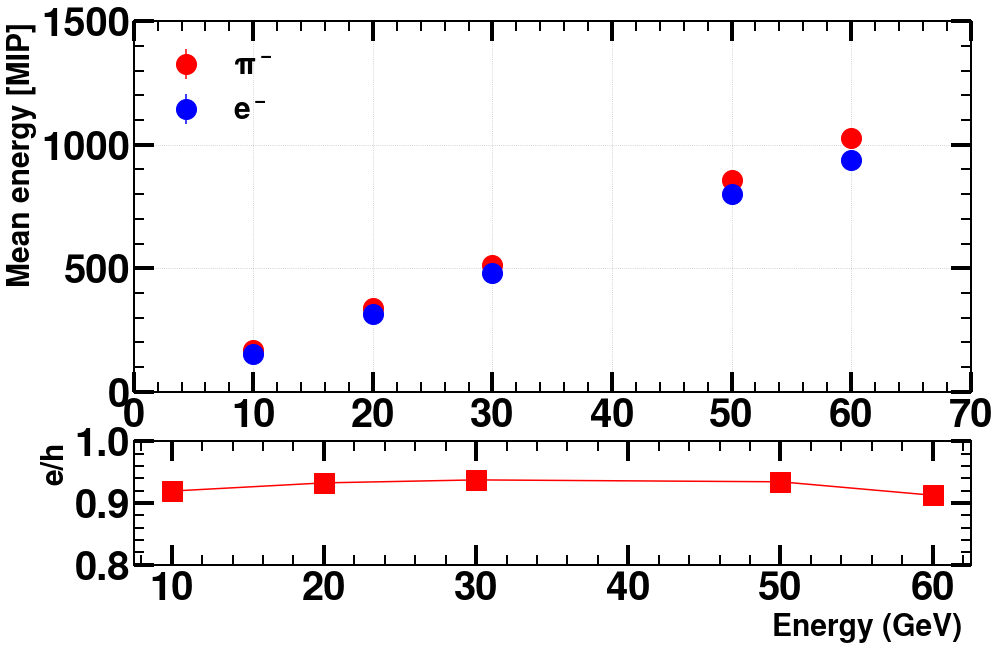

[0.3702 0.3394 0.3763 0.4931 0.652 ]
[0.35074 0.33654 0.43665 0.49562 0.3518 ]


In [7]:
PathToPlot='/home/bishnu/UCR_EIC/Plots/hepmc/'
'''
ratio=np.divide(el_means,pi_means)
Del_e=np.divide(el_means_error,el_means)
Del_p=np.divide(pi_means_error, pi_means)
abs_delta=np.sqrt((Del_e/el_means)**2 + (Del_p/pi_means)**2) *ratio
############### e/h ############
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
ax.errorbar(energies,ratio, abs_delta,color="red",marker='o',markersize=20,label='Reconstructed')

#ax.plot(energies,resolutions, color="blue",marker='*',label="Generated")
ax.set_ylabel('$e^-$/$\pi^-$')
ax.set_xlabel('Energy (GeV) ')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_ylim(0,1)

ax.xaxis.set_major_locator(MultipleLocator(10))
#ax.yaxis.set_major_locator(MultipleLocator(2))   
ax.xaxis.grid(True)
ax.yaxis.grid(True)
#ax.set_title("$e^-$/$\pi^-$")
FigName="eh_ratio_Energy.png"
plt.savefig(f"{PathToPlot}{FigName}")
plt.show()





#### Resolutions
el_resolutions=np.multiply(el_resolutions,100)
el_resolutions_errors=np.multiply(el_resolutions_errors,100)
pi_resolutions=np.multiply(pi_resolutions,100)
pi_resolutions_errors=np.multiply(pi_resolutions_errors,100)
#print(el_resolutions)
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
ax.errorbar(energies,pi_resolutions, pi_resolutions_errors ,color="red",marker='o',markersize=20,label='$\pi^-$')
ax.errorbar(energies,el_resolutions, el_resolutions_errors,color="blue",marker='o',markersize=20,label='$e^-$')
ax.set_ylabel('$\sigma$/E (%)')
ax.set_xlabel('Energy (GeV) ')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_ylim(0,30)

ax.xaxis.set_major_locator(MultipleLocator(10))
#ax.yaxis.set_major_locator(MultipleLocator(2))   
ax.xaxis.grid(True)
ax.yaxis.grid(True)
#ax.set_title("Resolution")
FigName="Res_e_pi_Energy.png"
plt.legend()
plt.savefig(f"{PathToPlot}{FigName}")
plt.show()


######## Leaks comparision ###########




'''

#def mean_comp_e_pi(energies, )
#### Mean comparsion
MIP_val=0.6 ## MeV
energies=np.asarray(energies)
el_means_error=np.asarray(el_means_error)
pi_means_error=np.asarray(pi_means_error)
mask=energies<70

el_means=np.divide(el_means,MIP_val)
el_means_errors=np.divide(el_means_error,MIP_val)
pi_means=np.divide(pi_means,MIP_val)
pi_means_errors=np.divide(pi_means_error,MIP_val)
ratio_mean=el_means[mask]/pi_means[mask]
#print(el_resolutions)


fig,(ax,ax1) = plt.subplots(2,1,gridspec_kw={'height_ratios': [3, 1]})
ax.errorbar(energies[mask],pi_means[mask], pi_means_errors[mask] ,color="red",marker='o',linestyle='None',markersize=20,label='$\pi^-$')
ax.errorbar(energies[mask],el_means[mask], el_means_errors[mask],color="blue",marker='o',linestyle='None',markersize=20,label='$e^-$')
ax.set_ylabel('Mean energy [MIP]')
ax.set_xlabel('Energy (GeV) ')
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_ylim(0,1500)
ax.set_xlim(0,70)

ax.xaxis.set_major_locator(MultipleLocator(10))
#ax.yaxis.set_major_locator(MultipleLocator(2))   
ax.xaxis.grid(True)
ax.yaxis.grid(True)
#ax.set_title("Resolution")
FigName="Comp_Mean_e_pi.png"
ax.legend()


ax1.plot(energies[mask], ratio_mean, color='red', marker='s',markersize=20)
ax1.set_ylim(0.8,1.0)
ax1.yaxis.set_major_locator(MultipleLocator(0.1))
ax1.set_ylabel('e/h')
ax1.set_xlabel('Energy (GeV) ')




plt.savefig(f"{PathToPlot}{FigName}")
plt.show()
print(pi_means_error[mask])
print(el_means_error[mask])
#print(energies)

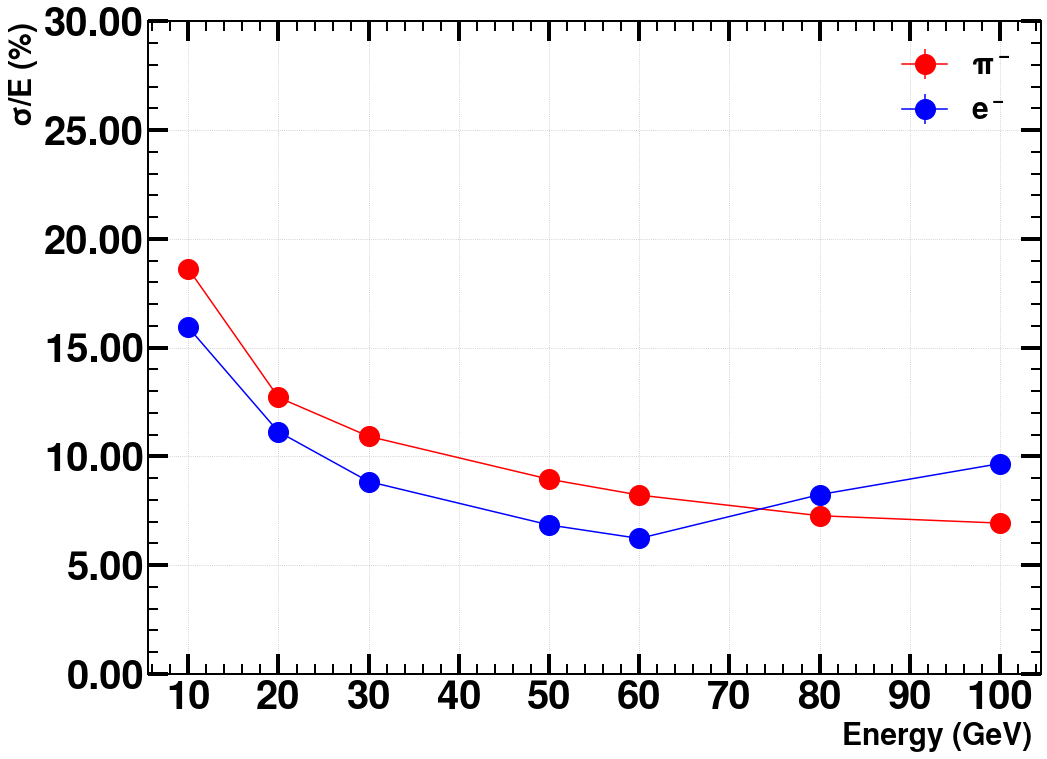

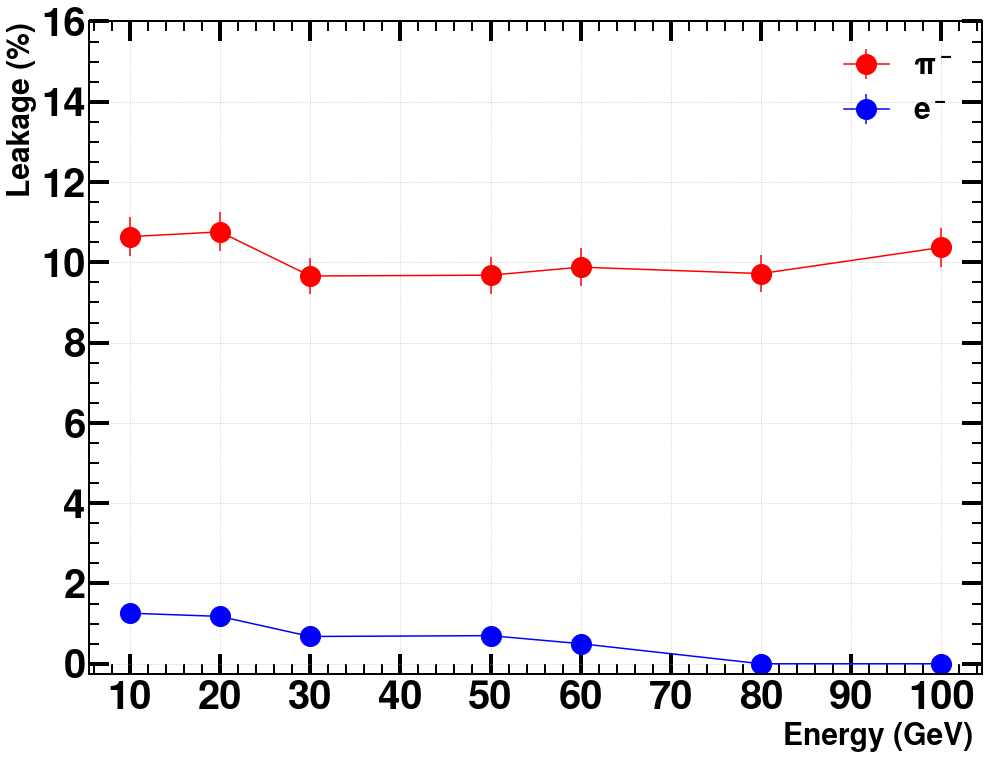

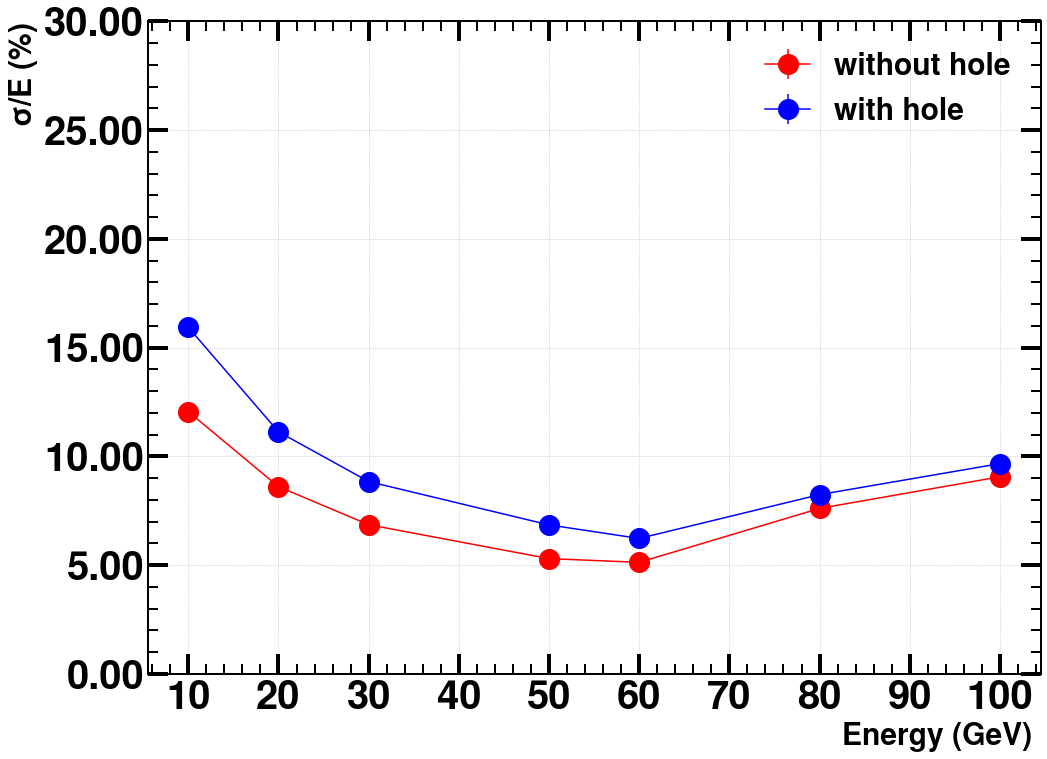

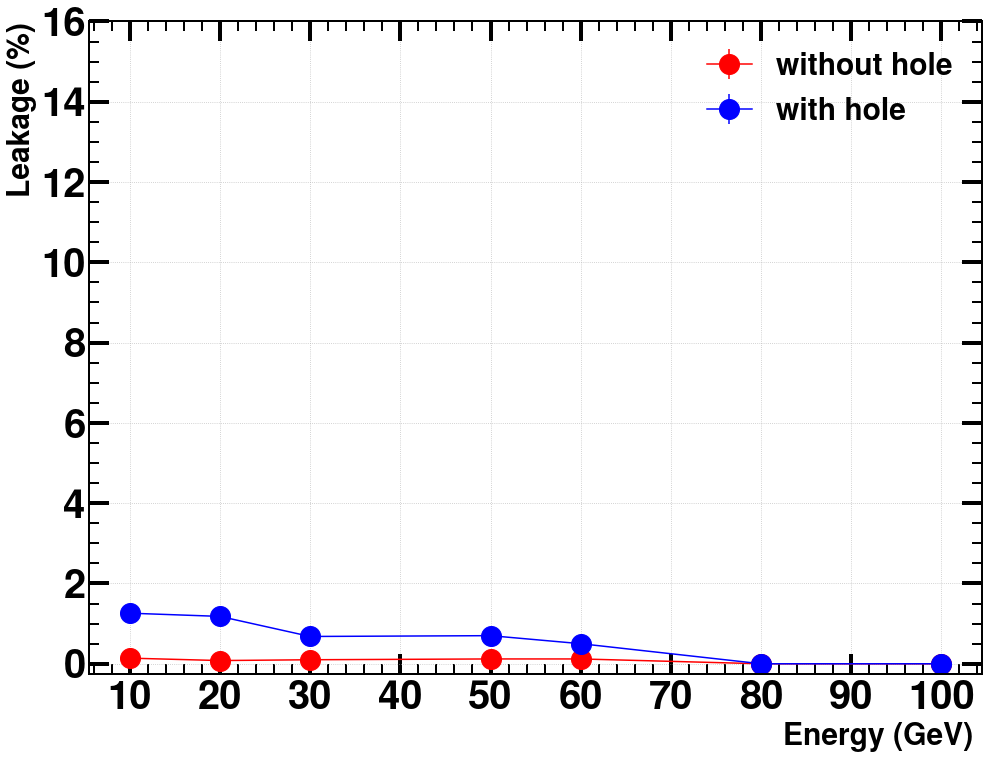

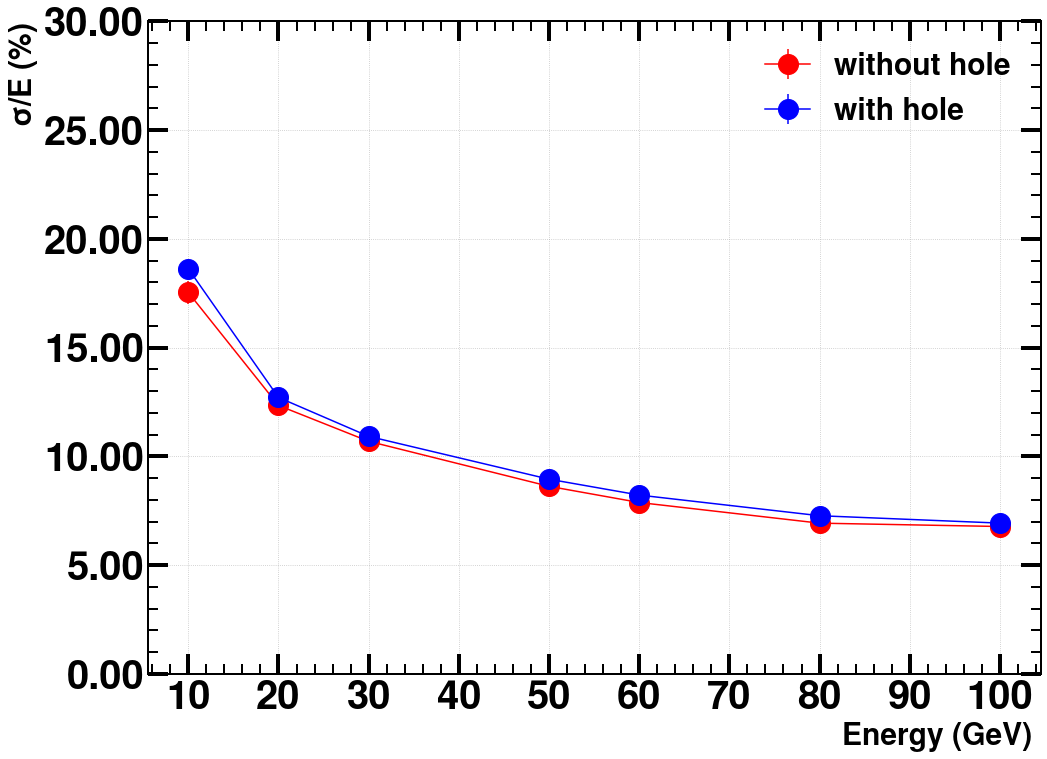

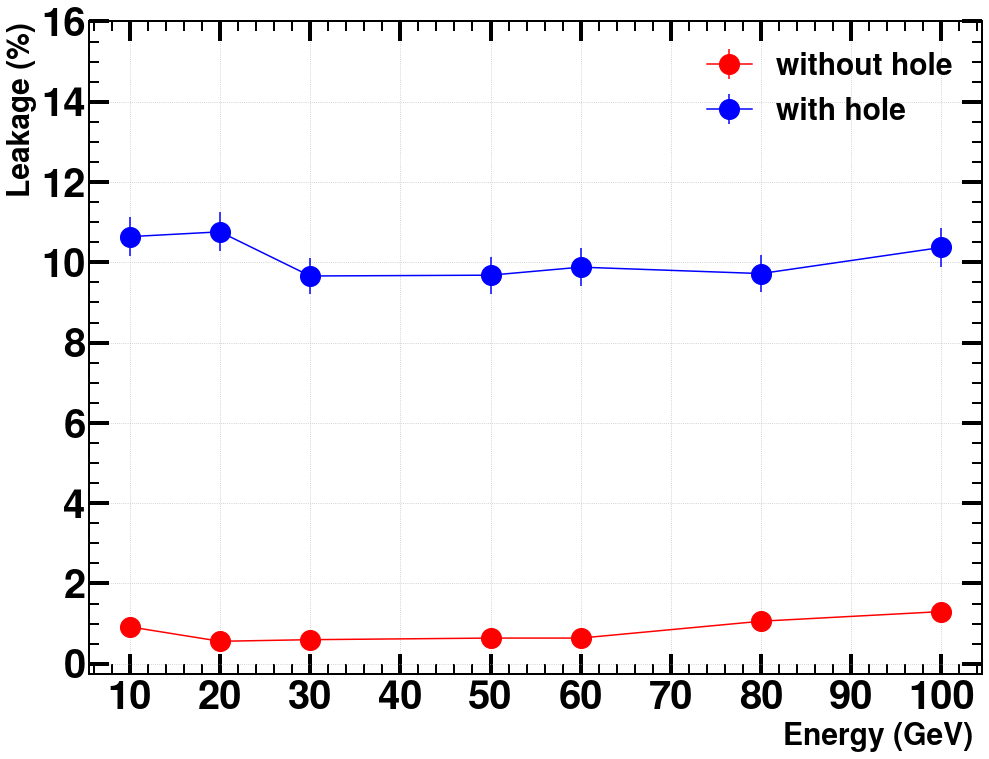

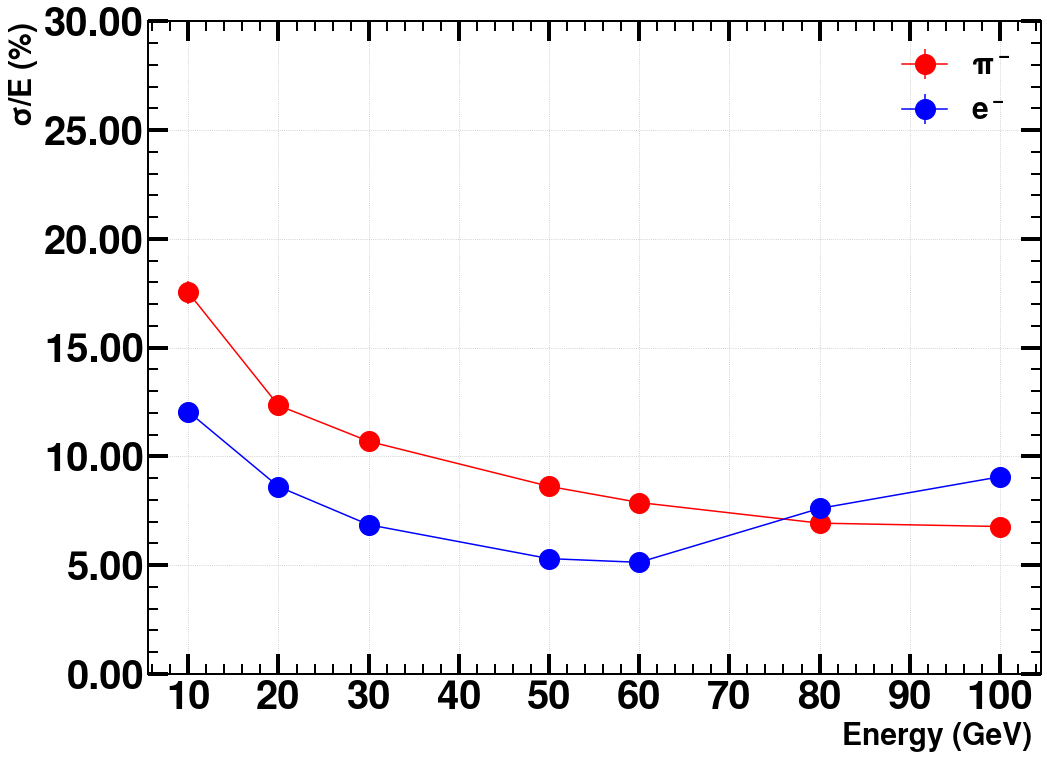

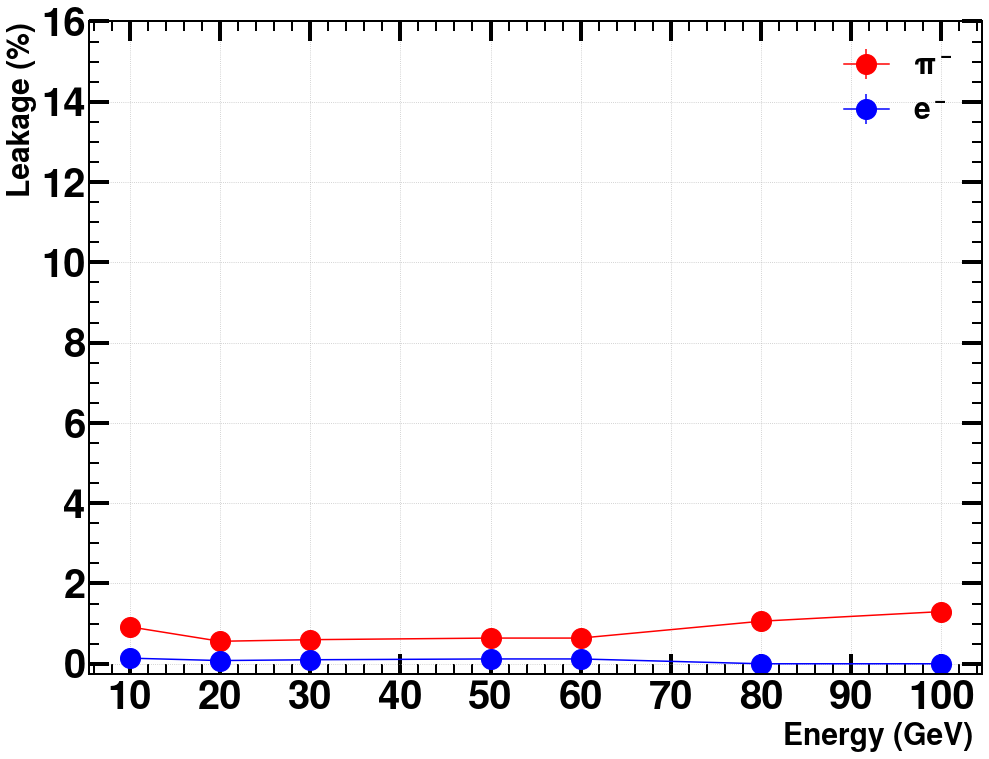

In [23]:
condition1='el_pion_withhole'
condition2='el_with_wout_hole'
condition3='pi_with_wout_hole'
condition4='el_pion_wout_hole'

## electron and pion without hole
plots.res_comp_hole_nohole(energies,condition1,el_resolutions,el_resolutions_errors, pi_resolutions,pi_resolutions_errors)
plots.Leakage_comp(energies,condition1,pi_leaks_per,pi_leaks_per_error,el_leaks_per,el_leaks_per_error)

## electron with and without hole
plots.res_comp_hole_nohole(energies,condition2,el_resolutions,el_resolutions_errors, el_resolutions_NH,el_resolutions_errors_NH)
plots.Leakage_comp(energies,condition2,el_leaks_per_NH,el_leaks_per_error_NH,el_leaks_per,el_leaks_per_error)
### pion with and without hole
plots.res_comp_hole_nohole(energies,condition3,pi_resolutions,pi_resolutions_errors, pi_resolutions_NH,pi_resolutions_errors_NH)
plots.Leakage_comp(energies,condition3,pi_leaks_per_NH,pi_leaks_per_error_NH,pi_leaks_per,pi_leaks_per_error)


### electron and pion with out hole
plots.res_comp_hole_nohole(energies,condition4,el_resolutions_NH,el_resolutions_errors_NH, pi_resolutions_NH,pi_resolutions_errors_NH)
plots.Leakage_comp(energies,condition4,pi_leaks_per_NH,pi_leaks_per_error_NH,el_leaks_per_NH,el_leaks_per_error_NH)


#print(el_resolutions)


In [9]:
array=[  5.,   2. ,  5. ,  1.,  11.,   8.,   5.,   6.,   4.,   4.,   9.,  11.,  10.,  10.,
  10.,  10.,   4. , 15.,   7.,  14.,  14.,  10. , 12. , 16.,  17.,  10.,  13.,  16.,
  16.,  19.,  10.,  16.,  20.,   9.,  12.,  12.,  13.,   8.,  11.,  14.,  10.,   9.,
  10.,   7.,  11.,  11.,   7]
np.sum(array)
       

484.0

In [10]:
condition2='el_with_wout_hole'
condition3='pi_with_wout_hole'

In [11]:
import math
theta_to_rad=math.pi/180.
thetas=np.array([2.32,2.56,2.83,3.13,3.46,3.82,4.23])
etas=np.array([3.9,3.8,3.7,3.6,3.5,3.4,3.3])
minus_theta=180-thetas
theta_rad_half=np.sin(thetas*theta_to_rad/2.0)

calc_etas=np.log(theta_rad_half)*-1.0

diff_eta=calc_etas-etas
np.set_printoptions(precision=2)
#print(diff_eta)  
print(calc_etas)

[3.9 3.8 3.7 3.6 3.5 3.4 3.3]


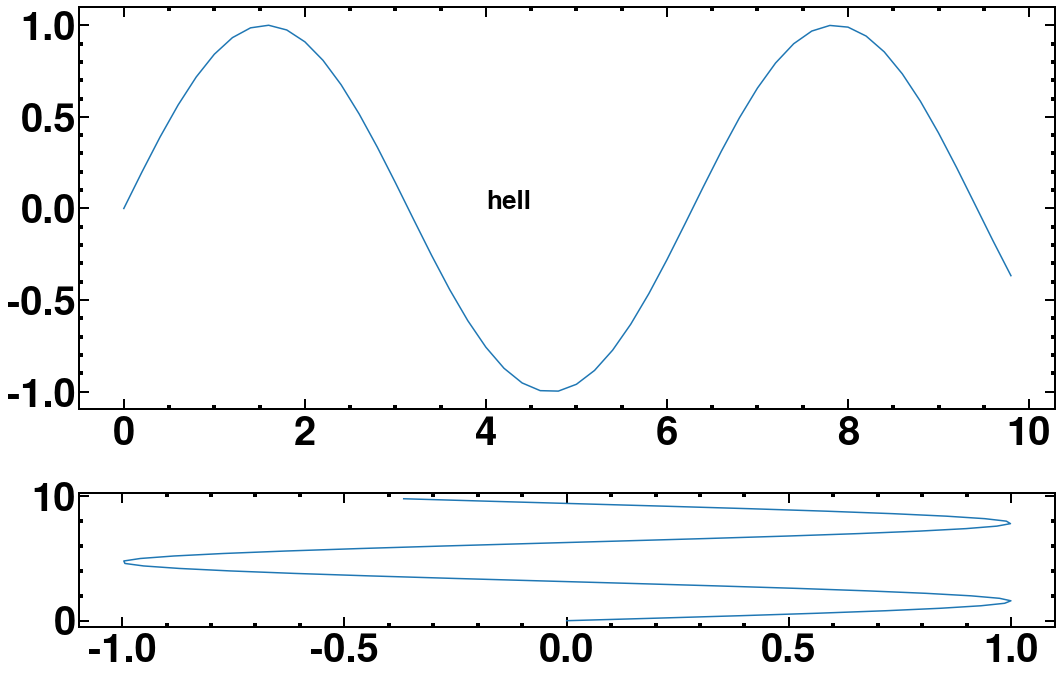

In [61]:
import numpy as np
import matplotlib.pyplot as plt 

# generate some data
x = np.arange(0, 10, 0.2)
y = np.sin(x)

# plot it
f, (a0, a1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
a0.plot(x, y)
a1.plot(y, x)
a0.text(4,0,'hell')
f.tight_layout()
#f.savefig('grid_figure.pdf')

## Simultaneous plots (HCAL + HCAL Insert fit and Guassian) for different rapidites


HELLO JELLO 2000
HELLO JELLO 2000
HELLO JELLO 2000
HELLO JELLO 2000
HELLO JELLO 2000
HELLO JELLO 2000
HELLO JELLO 2000
HELLO JELLO 2000
HELLO JELLO 2000
HELLO JELLO 2000
HELLO JELLO 2000
HELLO JELLO 2000


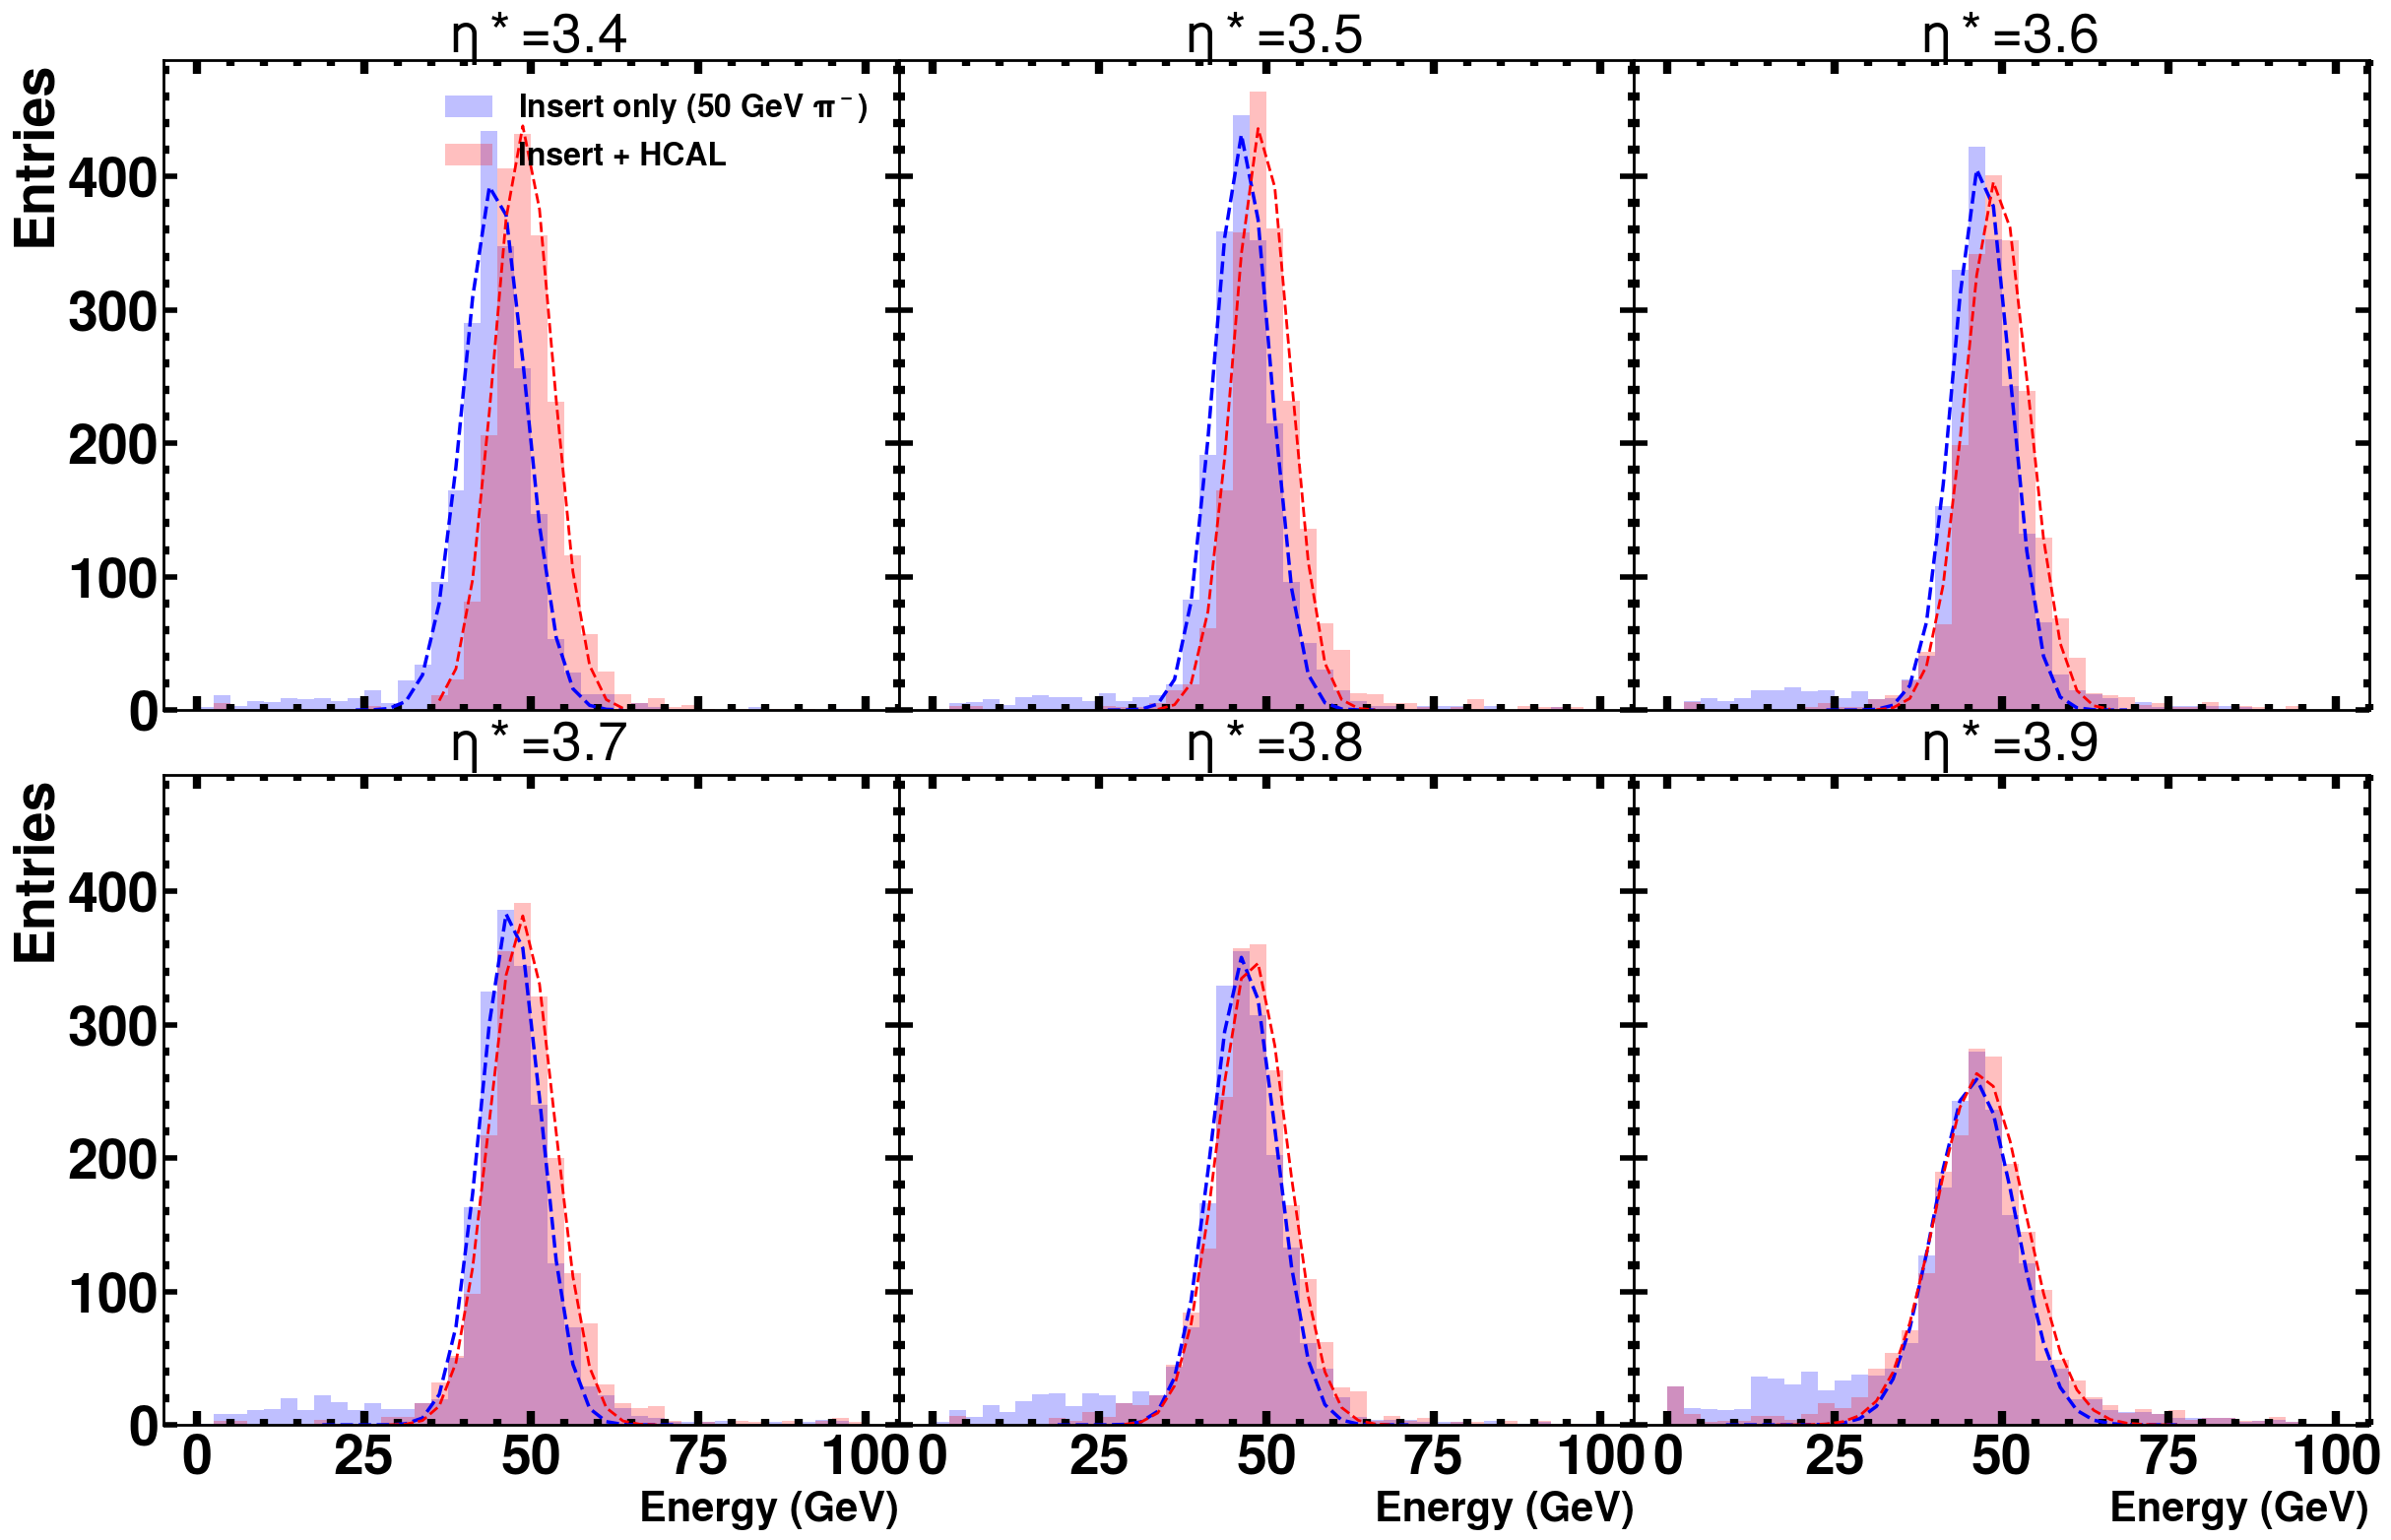

In [7]:
def get_fitted_mean_std():
    
    pi_means=[]
    pi_stds=[]
    pi_resolutions=[]
    pi_resolution_errors=[]
    pi_means_error=[]
    pi_stds_error=[]
    pi_leaks_per=[]
    pi_leaks_per_error=[]
    
    el_means=[]
    el_stds=[]
    el_resolutions=[]
    el_resolution_errors=[]
    el_means_error=[]
    el_stds_error=[]
    el_leaks_per=[]
    el_leaks_per_error=[]
    fraction=1 #(total events selected = events/fraction)
    sampling_fraction_hcali=0.0098*1000 #(GeV-1) old val 0.0092
    sampling_fraction_hcal=0.022*1000  #(GeV-1) old val 0.0215
    absorber_layers=["0W_54Fe","20W_34Fe","25W_29Fe","30W_24Fe","40W_14Fe"]
    index=3
    fileindex=f"deg_Athena_{absorber_layers[index]}"
    
    
    
    
    thetas=[3.82,3.46, 3.13, 2.83, 2.56,  2.32 ] #(eta lowest to highest)
    #thetas=[ 2.32, 2.56, 2.83, 3.13, 3.46, 3.82]# #(eta highest to lowest)
    first_row=int(len(thetas)/2)
    ncols=first_row
    nrows=2
    fig,ax = plt.subplots(nrows,ncols,figsize=(28,18),sharey=True,sharex=True)
    plt.subplots_adjust(left=0.1,  wspace=0.0, hspace=0.1)
    
    
    max_range=100
    particle='pi-'
    energies=50
    for ithetas in thetas:
        etas=plots.get_eta(ithetas)
        index_here = thetas.index(ithetas)
        if index_here<first_row:
            index=index_here
            plt_i=0
        
        elif index_here>=(first_row):
            index=index_here-first_row
            plt_i=1
        else: 
            print('No any rows or columns') 
            
        
               
        
        ### READING FOR HCAL INSERT 
        ene,time,PosRecoX,PosRecoY,PosRecoZ,mass,mom,energy_gen,phi,ene_good=plots.read_rootfile_HCAL_Insert\
        (fileindex,fraction,FilePathReco,energies,ithetas,particle, Time_Threshold,Energy_Threshold)
        
        #ene_good=good_energy
        ene_total_temp = np.sum(ene_good,axis=-1)
        ene_total_Insert = np.divide(ene_total_temp,sampling_fraction_hcali)
        
        
        #ene_total_Insert = ak.sum(ene_good,axis=-1)
        ene_average = np.mean(ene_good,axis=-1)
        mean_guess_Insert=np.mean(ene_total_Insert)
        sigma_guess_Insert=np.std(ene_total_Insert)
        nbins=40

        # READING HCAL 
        
        ene_hcal,time_hcal,PosRecoX_hcal,PosRecoY_hcal,PosRecoZ_hcal,mass_hcal,mom_hcal,energy_gen_hcal, \
        phi_hcal,ene_good_hcal=plots.read_rootfile_HCAL(fileindex,fraction,FilePathReco,energies,ithetas,particle,\
                                                         Time_Threshold,Energy_Threshold)
                                                        
        
        
        ### FOR INSERT AND HCAL SUM ENERGY
        ene_total_temp_hcal = np.sum(ene_good_hcal,axis=-1)
        ene_total_hcal_only = np.divide(ene_total_temp_hcal,sampling_fraction_hcal)
        
        
        
        #ene_total_hcal_only = ak.sum(ene_good_hcal,axis=-1)
        ene_total_hcal=np.add(ene_total_hcal_only,ene_total_Insert)

        mean_guess_hcal=np.mean(ene_total_hcal)
        sigma_guess_hcal=np.std(ene_total_hcal)
        
        #print(mean_guess_Insert,'  ', mean_guess_hcal, '   sigma ',sigma_guess_Insert,'   ',sigma_guess_hcal)
       
        
        
        param_bounds=([-np.inf,-np.inf,-np.inf], [np.inf,np.inf,np.inf])
        #FOR INSERT
        count, bins,_= ax[plt_i][index].hist(np.array(ene_total_Insert),bins=nbins,alpha=0.25,range=(0,max_range),\
                                      label='Insert only (50 GeV $\pi^-$)',linewidth='1',color='b')


        binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
          ## CHOOSE THE DATA POINTS WITHIN GIVEN SIGMAS FOR FITTING
        mask=(binscenters>(mean_guess_Insert-FIT_SIGMA*sigma_guess_Insert)) & \
        (binscenters<(mean_guess_Insert+FIT_SIGMA*sigma_guess_Insert))
        
         # PARAMETER BOUNDS ARE NOT USED FOR NOW INSERT
   
        popt, pcov = curve_fit(gaussian, binscenters[mask], count[mask],p0=[np.max(count),mean_guess_Insert,\
                                        sigma_guess_Insert], bounds=param_bounds)
        

        ax[plt_i][index].plot(binscenters[mask], gaussian(binscenters[mask], *popt), color='blue', \
                              linewidth=2.5, linestyle='dashed')#,label='Fit - Insert only')

        
        
        # FOR HCAL  + HCAL Insert
        count_hcal, bins_hcal,_= ax[plt_i][index].hist(np.array(ene_total_hcal),bins=nbins,alpha=0.25,
            range=(0,max_range),label='Insert + HCAL',linewidth='3',color='red')
        
        binscenters_hcal = np.array([0.5 * (bins_hcal[i] + bins_hcal[i+1]) for i in range(len(bins_hcal)-1)])
        
        mask_hcal=(binscenters_hcal>(mean_guess_hcal-FIT_SIGMA*sigma_guess_hcal)) & \
        (binscenters_hcal<(mean_guess_hcal+FIT_SIGMA*sigma_guess_hcal))


        

         # PARAMETER BOUNDS ARE NOT USED FOR NOW HCAL + HCAL_INSERT
        
        
       
        popt_hcal, pcov_hcal = curve_fit(gaussian, binscenters_hcal[mask_hcal], count_hcal[mask_hcal],\
                                         p0=[np.max(count_hcal),mean_guess_hcal, sigma_guess_hcal], \
                                         bounds=param_bounds)



        
        ax[plt_i][index].plot(binscenters_hcal[mask_hcal], gaussian(binscenters_hcal[mask_hcal], *popt_hcal), \
                       color='red', linewidth=2, linestyle='dashed')#,label=r'Fit - Insert + HCal')
        
        
        ax[plt_i][index].set_title(" $\eta*$={0:.1f}".format(etas))
        ax[plt_i][index].xaxis.set_major_locator(MultipleLocator(25))
        #ax[index].set_xlabel("Event energy (MeV)",fontsize=30)

        ax[1][index].set_xlabel("Energy (GeV)",fontsize=30)
        ax[plt_i][0].set_ylabel("Entries",fontsize=40)

        #ax[plt_i][index].set_aspect('auto')
        ### GET MEAN SIGMA AND ERRORS FROM FIT
        #mean=popt[1]
        #std=popt[2]

        #FigName='Fit_SimEnergy_4plots_{0}.pdf'.format(particle)
        #ax[plt_i][index].axvline(x=50.0, color='green', linestyle='dashed', linewidth=4, label='Vertical line 50 GeV')
        #ax1.axhline(0.90,color='blue',linewidth=3, linestyle='dashed') 
        FigName='Fit_SimEnergy_4plots_eta.pdf'
        ax[0][0].legend(loc='upper right')
        #plt.savefig(f"{PathToPlot}{FigName}")
        
        
        
#plots.print_decimal_pi(pi_means, pi_means_error, pi_stds,pi_stds_error,pi_leaks_per, pi_leaks_per_error,pi_resolutions,pi_resolution_errors)
#plots.print_decimal_el(el_means, el_means_error, el_stds,el_stds_error,el_leaks_per, el_leaks_per_error,el_resolutions,el_resolution_errors)





#plt.subplots_adjust(wspace=0, hspace=0)
#plt.legend()
#lt.show()    

get_fitted_mean_std()

In [ ]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='navy', linewidth=4),
                Line2D([0], [0], color='red', linewidth=4)]

plt.legend(custom_lines,['c1', 'c2'], loc='upper right')

## Weighted sum of the HCAL + HCALI 

1 nrows and ncols 1
HELLO JELLO 5000
HELLO JELLO 5000


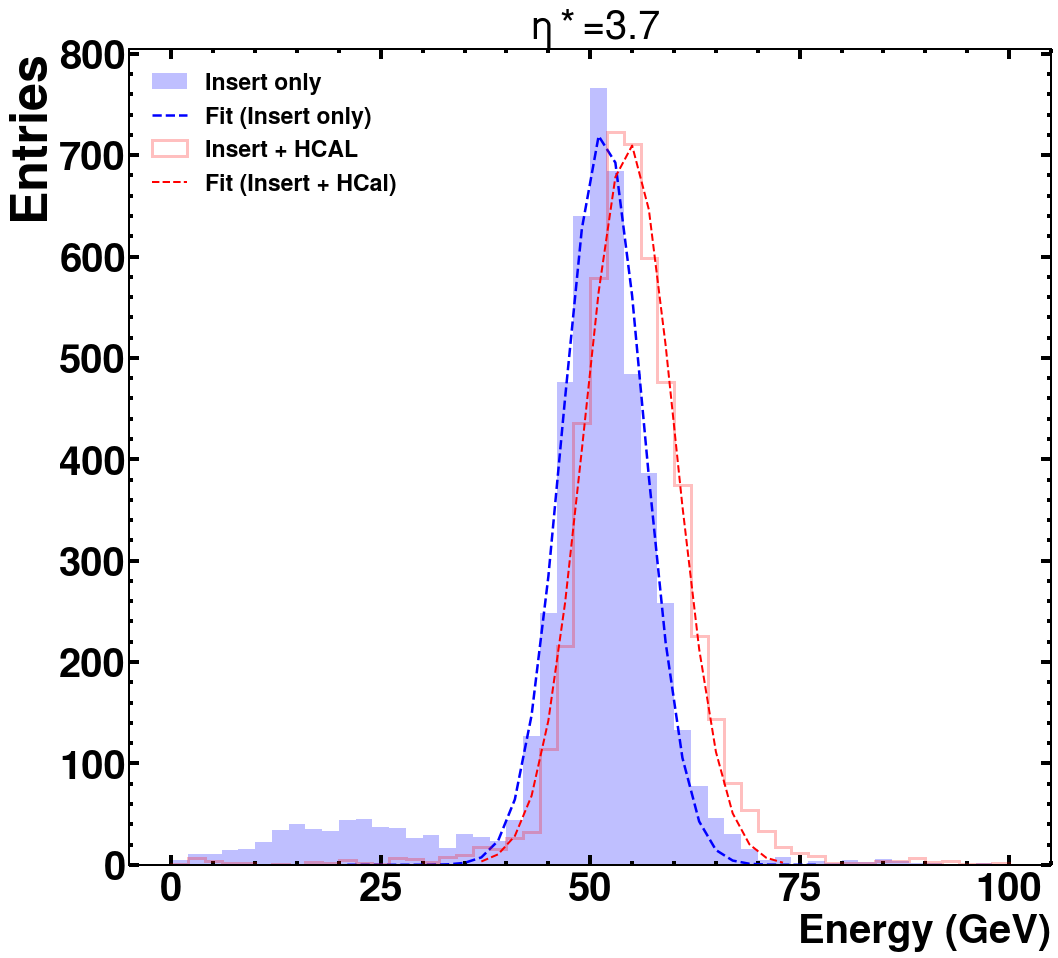

In [9]:
def get_fitted_mean_std(wt='on'):
    #takes the weighted average if wt='on'
    pi_means=[]
    pi_stds=[]
    pi_resolutions=[]
    pi_resolution_errors=[]
    pi_means_error=[]
    pi_stds_error=[]
    pi_leaks_per=[]
    pi_leaks_per_error=[]
    
    el_means=[]
    el_stds=[]
    el_resolutions=[]
    el_resolution_errors=[]
    el_means_error=[]
    el_stds_error=[]
    el_leaks_per=[]
    el_leaks_per_error=[]
    fraction=1 #(total events selected = events/fraction)
    fileindex='deg_Fe-W'
    #fileindex='deg'
    
    
    
    
    #thetas=[2.25, 2.32, 2.56, 2.83,3.13, 3.46, 3.82, 4.23]
    #thetas=[ 2.32, 2.56,2.83, 3.13, 3.46, 3.82]# #(eta highest to lowest)
    thetas=[2.83]#, 3.46, 3.82,2.83, 2.56, 2.32]
    #thetas=[3.82,3.46, 3.13, 2.83]#, 2.56,  2.32 ]
    #thetas=[2.32, 2.25]
    ncols=1
    nrows=1
    if(len(thetas)<2):
        first_row=1

    else:    
        first_row=int(len(thetas)/2)

    print(nrows, 'nrows and ncols', ncols)
    fig,ax = plt.subplots(nrows,ncols,figsize=(16,15),sharex=True)
    plt.subplots_adjust(left=0.1, wspace=0.15, hspace=0.1)
    
    
    
    particle='pi-'
    energies=50
    min_range=0
    if wt=='on':
        sampling_fraction_hcali=0.0092*1000 #(GeV-1)
        sampling_fraction_hcal=0.0215*1000  #(GeV-1)
        max_range=100
        nbins=50
        xlabel="Energy (GeV)"
    else:
        sampling_fraction_hcali=1 #(GeV-1)
        sampling_fraction_hcal=1  #(GeV-1)
        max_range=1300
        nbins=100
        xlabel="Energy (MeV)"
    xdiv=int((max_range-min_range)/4)
      
    for ithetas in thetas:
        etas=plots.get_eta(ithetas)
        index_here = thetas.index(ithetas)
        if index_here<first_row:
            index=index_here
            plt_i=0
        
        elif index_here>=(first_row):
            index=index_here-first_row
            plt_i=1
        else: 
            print('No any rows or columns') 
            
        
       
        
        ### READING FOR HCAL INSERT 
        ene,time,PosRecoX,PosRecoY,PosRecoZ,mass,mom,energy_gen,phi,ene_good=plots.read_rootfile_HCAL_Insert\
        (fileindex,fraction,FilePathReco,energies,ithetas,particle, Time_Threshold,Energy_Threshold)
        
        
      
    
        
        #ene_good=good_energy
        ene_total_Insert_temp = np.sum(ene_good,axis=-1)
        ene_total_Insert = np.divide(ene_total_Insert_temp,sampling_fraction_hcali)         

      
        
        ene_average = ak.mean(ene_good,axis=-1)
        mean_guess_Insert=np.mean(ene_total_Insert)
        sigma_guess_Insert=np.std(ene_total_Insert)
        
        
        
        #FOR INSERT
        count, bins,_= ax.hist(np.array(ene_total_Insert),bins=nbins,alpha=0.25,range=(0,max_range),\
                                      label='Insert only',linewidth='1',color='b')
       
        binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
          ## CHOOSE THE DATA POINTS WITHIN GIVEN SIGMAS FOR FITTING
        mask=(binscenters>(mean_guess_Insert-FIT_SIGMA*sigma_guess_Insert)) & \
        (binscenters<(mean_guess_Insert+FIT_SIGMA*sigma_guess_Insert))
        
        
        # PARAMETER BOUNDS ARE NOT USED FOR NOW INSERT
        param_bounds=([-np.inf,-np.inf,-np.inf], [np.inf,np.inf,np.inf])
        popt, pcov = curve_fit(gaussian, binscenters[mask], count[mask],p0=[np.max(count),mean_guess_Insert,\
                                        sigma_guess_Insert], bounds=param_bounds)

        ax.plot(binscenters[mask], gaussian(binscenters[mask], *popt), color='blue', \
                              linewidth=2.5, linestyle='dashed',label='Fit (Insert only)')

        # READING HCAL 
        
        ene_hcal,time_hcal,PosRecoX_hcal,PosRecoY_hcal,PosRecoZ_hcal,mass_hcal,mom_hcal,energy_gen_hcal, \
        phi_hcal,ene_good_hcal=plots.read_rootfile_HCAL(fileindex,fraction,FilePathReco,energies,ithetas,particle,\
                                                         Time_Threshold,Energy_Threshold)
                                                        
        
        
        ### FOR INSERT AND HCAL SUM ENERGY
        ene_total_hcal_only_temp = np.sum(ene_good_hcal,axis=-1)
       
        ene_total_hcal_only = np.divide(ene_total_hcal_only_temp,sampling_fraction_hcal)
        
        ene_total_hcal=np.add(ene_total_hcal_only,ene_total_Insert)

        mean_guess_hcal=np.mean(ene_total_hcal)
        sigma_guess_hcal=np.std(ene_total_hcal)
        
        #print(mean_guess_Insert,'  ', mean_guess_hcal, '   sigma ',sigma_guess_Insert,'   ',sigma_guess_hcal)
        
        
        
       
        

        
    
        # FOR HCAL  + HCAL Insert
        count_hcal, bins_hcal,_= ax.hist(np.array(ene_total_hcal),bins=nbins,alpha=0.25,range=(0,max_range),\
                                                label='Insert + HCAL',linewidth='3',color='red',
                                                       histtype='step')
        binscenters_hcal = np.array([0.5 * (bins_hcal[i] + bins_hcal[i+1]) for i in range(len(bins_hcal)-1)])
        #print ()
        mask_hcal=(binscenters_hcal>(mean_guess_hcal-FIT_SIGMA*sigma_guess_hcal)) & \
        (binscenters_hcal<(mean_guess_hcal+FIT_SIGMA*sigma_guess_hcal))



      




         # PARAMETER BOUNDS ARE NOT USED FOR NOW HCAL + HCAL_INSERT


        popt_hcal, pcov_hcal = curve_fit(gaussian, binscenters_hcal[mask_hcal], count_hcal[mask_hcal],\
                                         p0=[np.max(count_hcal),mean_guess_hcal, sigma_guess_hcal], \
                                         bounds=param_bounds)




        ax.plot(binscenters_hcal[mask_hcal], gaussian(binscenters_hcal[mask_hcal], *popt_hcal), \
                       color='red', linewidth=2, linestyle='dashed',label=r'Fit (Insert + HCal)')

        
        ax.set_title(" $\eta*$={0:.1f}".format(etas))
        ax.xaxis.set_major_locator(MultipleLocator(xdiv))
        #ax[index].set_xlabel("Event energy (MeV)",fontsize=30)

        ax.set_xlabel(xlabel,fontsize=40)
        ax.set_ylabel("Entries",fontsize=50)
        #ax[0][0].set_ylim(0,700)
        #ax[0][0].xaxis.set_major_locator(MultipleLocator(20))
        #ax[plt_i][index].set_aspect('auto')
        ### GET MEAN SIGMA AND ERRORS FROM FIT
        #mean=popt[1]
        #std=popt[2]

        #FigName='Fit_SimEnergy_4plots_{0}.pdf'.format(particle)
        #ax.text(0, 300, '$\pi^-$ \n 50 GeV', color='black',\
        #    bbox=dict(facecolor='none', edgecolor='none', boxstyle='round'),fontsize=50)
            
        #ax[1][1].text(0, 250, ' $\pi^-$\n 50 GeV ', color='black',\
        #    bbox=dict(facecolor='none',edgecolor='none', boxstyle='round'), fontsize=50)
        FigName='Fit_SimEnergy_4plots_eta_{0}.pdf'.format(wt)
        ax.legend(loc='upper left')
        #ax[0][0].legend(bbox_to_anchor=(0., 0.5,), loc=3)#loc='upper right')
        plt.savefig(f"{PathToPlot}{FigName}")
        
        
        
#plots.print_decimal_pi(pi_means, pi_means_error, pi_stds,pi_stds_error,pi_leaks_per, pi_leaks_per_error,pi_resolutions,pi_resolution_errors)
#plots.print_decimal_el(el_means, el_means_error, el_stds,el_stds_error,el_leaks_per, el_leaks_per_error,el_resolutions,el_resolution_errors)





#plt.subplots_adjust(wspace=0, hspace=0)
#plt.legend()
plt.show()    

get_fitted_mean_std('on')